# Анализ вакансий HH.ru

**Цель работы:**
- Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

Данные были получены с использованием API HH.ru.

**Основные шаги выполнения:**
- **Загрузка данных**

- **Предобработка данных:** подготовка данных для дальнейшего анализа, включая очистку и преобразование.

- **Исследовательский анализ данных:**
  - **Анализ грейдов специалистов:** определение уровня квалификации (грейда) специалистов на основе названий вакансий и требований к опыту работы. Выделение доли грейдов Junior, Junior+, Middle, Senior среди вакансий "Аналитик данных" и "Системный аналитик".
  - **Анализ типичного места работы:** исследование типичных условий работы для аналитиков данных и системных аналитиков по следующим параметрам: ТОП-работодатели, зарплата, тип занятости и график работы. Анализ проводится отдельно для каждого грейда (Junior, Junior+, Middle, Senior).
  - **Анализ навыков:** сравнение востребованности твёрдых (hard) и мягких (soft) навыков, определение их связи с уровнем квалификации и специальностью. Выявление, какие навыки более важны для каждого грейда и для каждой из профессий. Определение желаемого кандидата: анализ наиболее востребованных кандидатов на позиции "Аналитик данных" и "Системный аналитик" по ключевым hard и soft навыкам. Проведение анализа отдельно для каждого уровня квалификации.
- **Формулирование выводов и рекомендаций:** выводы на основе полученных результатов и разработка рекомендаций по улучшению стратегии поиска работы для кандидатов.

## Загрузка и просмотр данных

In [1]:
# Подключение всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Отключаем предупреждения FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Устанавливаем отображение всех столбцов
pd.set_option('display.max_columns', None)

# Установим стиль оформления для графиков Seaborn
sns.set(style="whitegrid")

In [2]:
# Путь к данным на Google Drive
url_da = 'https://drive.google.com/uc?id=' + '1W9ME66BWOADJl8tca-CL0Adfhz2V2FrC'
url_sa = 'https://drive.google.com/uc?id=' + '1AkqPLbX88bl42iZbPXtEAS_YmF0ta9BS'

In [3]:
# Загрузка данных в DataFrame
data_da = pd.read_excel(url_da, engine='openpyxl')
data_sa = pd.read_excel(url_sa, engine='openpyxl')

In [4]:
# Получение общей информации о первом DataFrame
data_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [5]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [6]:
# Получение общей информации о втором DataFrame
data_sa.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [7]:
data_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

Подробное описание всех столбцов:
- `id` - Уникальный идентификатор вакансии. (int64) <br>
- `name` - Название вакансии. (object) <br>
- `published_at` - Дата публикации. (datetime64) <br>
- `alternate_url` - Ссылка на вакансию. (object) <br>
- `type` - Статус вакансии на момент получения данных от API и передачи их в базу. (object) <br>
- `employer` - Работодатель. (object) <br>
- `department` - Работодатель, отдел. (object) <br>
- `area` - Регион места работы. (object) <br>
- `experience` - Требуемый опыт работы. (object) <br>
- `key_skills` - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. (object) <br>
- `schedule` - График работы. (object) <br>
- `employment` - Тип занятости. (object) <br>
- `description` - Описание вакансии. (object) <br>
- `description_lemmatized` - Лемматизированное описание вакансии. (object) <br>
- `salary_from` - Нижняя граница предлагаемой заработной платы. (float64) <br>
- `salary_to` - Верхняя граница предлагаемой заработной платы. (float64) <br>
- `salary_bin` - Категория зарплаты. (object) <br>
- `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии key_skills. (object) <br>
- `hard_skills_from_description` - “Твердые” навыки, найденные при обработке полей с навыками. (object) <br>
- `soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. (object) <br>

Поскольку столбцы у датафреймов одинаковые, объединим их в один и будем дальше работать с одним.<br>
Но перед этим дополнительно добавим метки по названиям позиций (DA/SA), чтобы потом было проще их отличать.

In [8]:
# Добавляем столбец с метками для данных из датафрейма с аналитиками данных
data_da['position_type'] = 'Data Analyst'

# Добавляем столбец с метками для данных из датафрейма с системными аналитиками
data_sa['position_type'] = 'System Analyst'

In [9]:
# Объединение двух датафреймов
data = pd.concat([data_da, data_sa], ignore_index=True)

In [10]:
data.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,position_type
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Data Analyst
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,Data Analyst
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Data Analyst
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,Data Analyst
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,Data Analyst


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null 

Таким образом, мы загрузили данные и получили один датафрейм с описанием вакансий профессий "Аналитик данных" и "Системный аналитик".

## Предобработка данных

### Поиск дублей

Проверим данные на явные дубликаты.

In [12]:
# Проверка на полные дубликаты
data.duplicated().sum()

0

Для проверки неявных дублей можем рассмотреть ссылку на вакансию, она должна быть уникальной.

In [13]:
# Определим столбцы, по которым будем искать неявные дубликаты
columns_to_check = ['alternate_url']

# Проверка на неявные дубликаты по указанным столбцам
implicit_duplicates = data[data.duplicated(subset=columns_to_check, keep=False)]
implicit_duplicates

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,position_type
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,Data Analyst
103,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,Data Analyst
104,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,Data Analyst
344,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,Data Analyst
1461,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Системный анализ', 'DWH']",Полный день,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,Data Analyst
1832,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,System Analyst
1833,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,System Analyst
1834,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,System Analyst
3178,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata,

Несмотря на то что нашлись дубли по ссылке (у строк одинаковый id и ссылка), по дате публикации вакансии различаются примерно на месяц. Скорее всего, это означает, что кандидаты, которые были выбраны на эти вакансии, в конечном итоге не подошли, поэтому вакансии снова открылись спустя время. Однако, `id` должно быть уникальным идентификатором, поэтому присвоим дублям новые `id`.

In [14]:
# Список индексов строк с дубликатами, которые нужно обновить
duplicate_indices = [102, 103, 104, 344, 1461]

# Найдем максимальный ID в датафрейме, чтобы начать присваивать новые значения
max_id = data['id'].max()

# Присвоение новых уникальных ID для каждой строки с дубликатом
for index in duplicate_indices:
    max_id += 1
    data.at[index, 'id'] = max_id

In [15]:
# Снова проверим неявные дубли
# Определим столбцы, по которым будем искать неявные дубликаты
columns_to_check = ['id']

# Проверка на неявные дубликаты по указанным столбцам
implicit_duplicates = data[data.duplicated(subset=columns_to_check, keep=False)]
implicit_duplicates

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,position_type


Отлично, будем считать, что неявные дубли обработаны.

### Поиск пропусков

In [16]:
# Проверим количество пропусков в каждом столбце
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

department                          2834
salary_from                         3012
salary_to                           3209
key_skills_from_key_skills_field    1349
hard_skills_from_description        2728
soft_skills_from_description        1701
dtype: int64

- `department` - это дополнение к информации о работодателе, этот столбец можем оставить как есть, поскольку он не несет значимой информации. <br>
- `salary_from` и `salary_to` - информация о заработной плате для вакансии. Мы можем заполнить эти данные медианным значением по грейду. Поскольку пропусков очень много (3012 и 3209 из 3716, то есть около 80%), лучше их заполнить. Сделаем это после выделения грейдов. <br>
- `key_skills_from_key_skills_field`, `hard_skills_from_description` и `soft_skills_from_description` - поля о ключевых навыках для вакансии. Заполнять первый столбец не будем, поскольку у нас уже есть столбец `key_skills` без пропусков. А столбцы с hard и soft skills обработаем позже, в блоке об анализе навыков.

Таким образом, мы изучили пропуски. Столбцы о зарплате заполним в следующем разделе после выделения грейда. Столбцы с навыками обработаем в блоке об анализе навыков.

### Добавление новых столбцов

Поскольку дальнейший анализ мы будем проводить по грейдам, выделим их, используя столбец `experience`.

In [17]:
# Просмотр уникальных значений столбца 'experience'
data['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [18]:
# Словарь для маппинга опыта работы в грейды
experience_to_grade = {
    'Junior (no experince)': 'Junior',
    'Junior+ (1-3 years)': 'Junior+',
    'Middle (3-6 years)': 'Middle',
    'Senior (6+ years)': 'Senior'
}

# Создаем новый столбец 'grade' с использованием словаря
data['grade'] = data['experience'].map(experience_to_grade)

# Проверка результатов
data[['experience', 'grade']].head(10)

,experience,grade
0,Junior (no experince),Junior
1,Junior (no experince),Junior
2,Junior+ (1-3 years),Junior+
3,Junior+ (1-3 years),Junior+
4,Middle (3-6 years),Middle
5,Middle (3-6 years),Middle
6,Junior+ (1-3 years),Junior+
7,Junior+ (1-3 years),Junior+
8,Junior+ (1-3 years),Junior+
9,Junior+ (1-3 years),Junior+


Теперь заполним пропуски в столбцах `salary_from` и `salary_to` медианным значением с разделением на грейды и позиции.

In [19]:
# Сначала вычислим медианы для каждой комбинации грейда и позиции
salary_medians = data.groupby(['grade', 'position_type'])[['salary_from', 'salary_to']].median().reset_index()

# Теперь заполним пропуски медианами
def fill_missing_salaries(row, salary_medians):
    if pd.isna(row['salary_from']):
        # Заполняем пропуск медианным значением для комбинации грейд+позиция
        row['salary_from'] = salary_medians[(salary_medians['grade'] == row['grade']) &
                                            (salary_medians['position_type'] == row['position_type'])]['salary_from'].values[0]
    if pd.isna(row['salary_to']):
        # Заполняем пропуск медианным значением для комбинации грейд+позиция
        row['salary_to'] = salary_medians[(salary_medians['grade'] == row['grade']) &
                                          (salary_medians['position_type'] == row['position_type'])]['salary_to'].values[0]
    return row

# Применяем функцию к каждому ряду датафрейма
data = data.apply(fill_missing_salaries, axis=1, salary_medians=salary_medians)

# Проверим, что пропуски заполнены
data[['salary_from', 'salary_to']].isna().sum()

salary_from    0
salary_to      0
dtype: int64

Теперь рассчитаем среднюю зарплату для каждой позиции. Это тоже пригодится нам в анализе.

In [20]:
# Рассчитаем среднюю зарплату для каждой строки
data['average_salary'] = data[['salary_from', 'salary_to']].mean(axis=1)

data[['average_salary', 'salary_from', 'salary_to']].tail()

,average_salary,salary_from,salary_to
3711,146000.0,120000.0,172000.0
3712,146000.0,120000.0,172000.0
3713,247500.0,200000.0,295000.0
3714,95000.0,80000.0,110000.0
3715,310000.0,280000.0,340000.0


Мы выполнили предобработку данных и можем приступать к анализу.

## Исследовательский анализ данных

Определимся с тем, насколько данные актуальны на сегодняшний день.

In [21]:
data['published_at'].min(), data['published_at'].max()

(Timestamp('2024-02-13 21:45:51'), Timestamp('2024-07-09 12:47:11'))

Получается, что мы анализируем данные за первую половину 2024 года с 13 февраля по 9 июля. Попробуем углубить анализ по позициям.

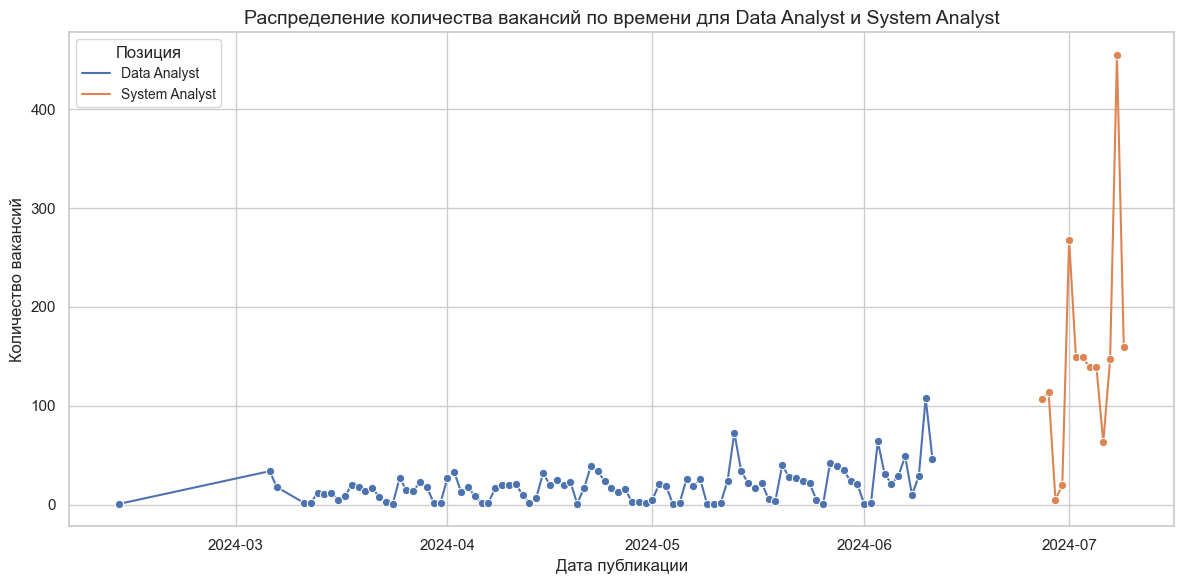

In [22]:
# Конвертируем столбец с датой в формат datetime
data['published_at'] = pd.to_datetime(data['published_at'])

# Группируем данные по дате (по дням) и позиции, считая количество вакансий для каждой комбинации
time_distribution = data.groupby([data['published_at'].dt.date, 'position_type']).size().reset_index(name='count')

# Построение временной диаграммы для отображения распределения количества вакансий по времени
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_distribution, x='published_at', y='count', hue='position_type', marker='o')
plt.title('Распределение количества вакансий по времени для Data Analyst и System Analyst', fontsize=14)
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.legend(title='Позиция', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()

In [23]:
# Проверим минимальные и максимальные даты для каждой позиции
min_max_dates = data.groupby('position_type')['published_at'].agg(['min', 'max']).reset_index()
min_max_dates

,position_type,min,max
0,Data Analyst,2024-02-13 21:45:51,2024-06-11 15:07:30
1,System Analyst,2024-06-27 06:08:10,2024-07-09 12:47:11


Данные по вакансиям для позиций Data Analyst и System Analyst были собраны не параллельно, а последовательно, с заметным временным сдвигом между периодами сбора. Такой подход может повлиять на качество анализа, поскольку не позволяет учесть сезонные колебания и другие временные особенности, характерные для обоих типов вакансий.

### Общее распределение вакансий по позициям и грейдам

Начнем с общей информации. Посмотрим, сколько вакансий у нас есть.

System Analyst    1915
Data Analyst      1801
Name: position_type, dtype: int64


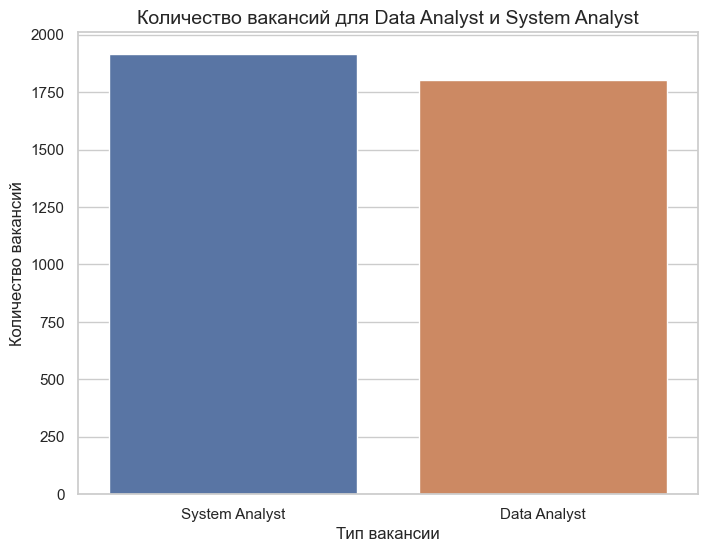

In [24]:
# Подсчет количества вакансий для каждой категории
category_counts = data['position_type'].value_counts()
print(category_counts)

# Построение графика для сравнения количества вакансий
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Количество вакансий для Data Analyst и System Analyst', fontsize=14)
plt.xlabel('Тип вакансии', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.show()

Теперь посмотрим на распределение вакансий по грейдам.

     grade   position_type  count
0   Junior    Data Analyst    142
1   Junior  System Analyst     86
2  Junior+    Data Analyst   1091
3  Junior+  System Analyst    852
4   Middle    Data Analyst    555
5   Middle  System Analyst    933
6   Senior    Data Analyst     13
7   Senior  System Analyst     44


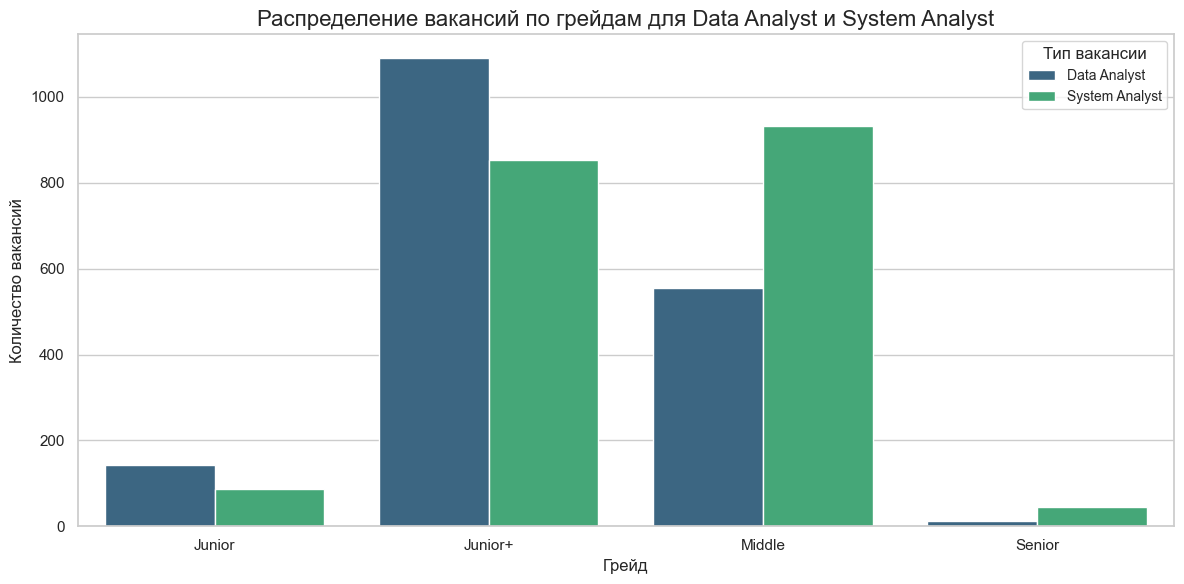

In [25]:
# Построим таблицу частот по грейдам и типу вакансии
grade_counts = data.groupby(['grade', 'position_type']).size().reset_index(name='count')
print(grade_counts)

# Построение графика распределения по грейдам для каждой позиции
plt.figure(figsize=(12, 6))
sns.barplot(data=grade_counts, x='grade', y='count', hue='position_type', palette='viridis')

# Добавление заголовка и подписей осей
plt.title('Распределение вакансий по грейдам для Data Analyst и System Analyst', fontsize=16)
plt.xlabel('Грейд', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)

# Отображение легенды и графика
plt.legend(title='Тип вакансии', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()

Анализ показал, что общее количество вакансий для System Analyst составляет 1915, что немного больше, чем для Data Analyst, у которых 1801 вакансия. Основное распределение вакансий по грейдам демонстрирует, что для обеих позиций наибольшее количество вакансий относится к уровню Junior+ (1-3 года опыта): 1091 для Data Analyst и 852 для System Analyst. Это указывает на высокий спрос на специалистов с небольшим опытом работы.

Вакансий уровня Middle также достаточно много, особенно для System Analyst (933 вакансии по сравнению с 555 у Data Analyst), что может свидетельствовать о более высоких требованиях к квалификации для этой позиции. Число вакансий уровня Senior значительно меньше, но для System Analyst их всё же больше (44 вакансии), чем для Data Analyst (13 вакансий). Это отражает ожидания рынка, где опытные специалисты требуются реже, но обладают высокой ценностью для работодателей.

### Анализ типичного места работы

Исследуем типичные условия работы для аналитиков данных и системных аналитиков по следующим параметрам: ТОП-работодатели, зарплата, тип занятости и график работы.

#### ТОП-работодатели

Будем определять топ-работодателей по количеству вакансий от этого работодателя. Посмотрим сначала распределение по позициям без учета грейдов.

    position_type        employer  count
534  Data Analyst            СБЕР    243
193  Data Analyst     WILDBERRIES     43
132  Data Analyst            Ozon     34
255  Data Analyst  Банк ВТБ (ПАО)     28
594  Data Analyst              Т1     26
       position_type                   employer  count
1355  System Analyst                       СБЕР     95
1418  System Analyst                         Т1     80
716   System Analyst                      Aston     65
1390  System Analyst      Совкомбанк Технологии     37
1286  System Analyst  ПСБ (ПАО «Промсвязьбанк»)     30


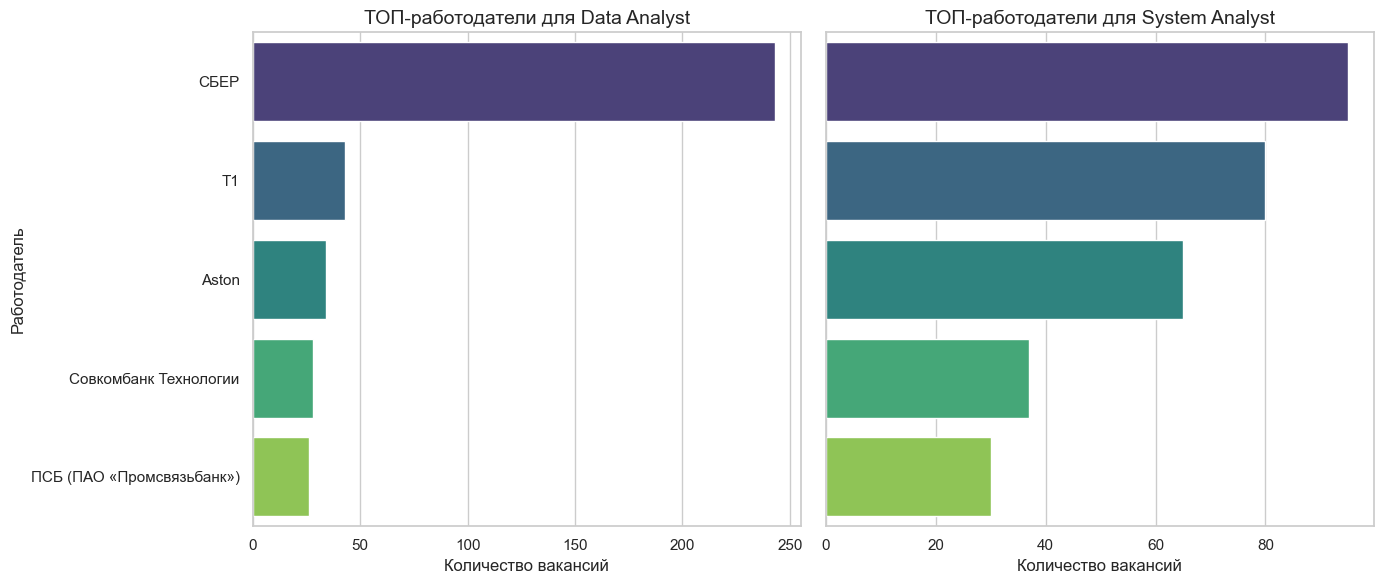

In [26]:
# Подсчет количества вакансий для каждого работодателя, разделенных по типу вакансии
top_employers = data.groupby(['position_type', 'employer']).size().reset_index(name='count')

# Сортируем и выбираем ТОП-5 работодателей для каждой категории
top_employers_da = top_employers[top_employers['position_type'] == 'Data Analyst'].nlargest(5, 'count')
top_employers_sa = top_employers[top_employers['position_type'] == 'System Analyst'].nlargest(5, 'count')

# Вывод в виде таблицы
print(top_employers_da)
print(top_employers_sa)

# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# График для Data Analyst
sns.barplot(ax=axes[0], data=top_employers_da, x='count', y='employer', palette='viridis')
axes[0].set_title('ТОП-работодатели для Data Analyst', fontsize=14)
axes[0].set_xlabel('Количество вакансий', fontsize=12)
axes[0].set_ylabel('Работодатель', fontsize=12)

# График для System Analyst
sns.barplot(ax=axes[1], data=top_employers_sa, x='count', y='employer', palette='viridis')
axes[1].set_title('ТОП-работодатели для System Analyst', fontsize=14)
axes[1].set_xlabel('Количество вакансий', fontsize=12)
axes[1].set_ylabel('')

# Улучшаем внешний вид графиков
plt.tight_layout()
plt.show()

Анализ показал, что наибольшее количество вакансий для обеих позиций размещает компания СБЕР: 243 вакансии для Data Analyst и 95 вакансий для System Analyst, что делает её крупнейшим работодателем в обоих направлениях.

Для позиции Data Analyst среди других лидеров выделяются WILDBERRIES (43 вакансии), Ozon (34 вакансии), Банк ВТБ (ПАО) (28 вакансий) и Т1 (26 вакансий). Эти компании также активно ищут специалистов в области анализа данных.

Для позиции System Analyst помимо СБЕР, крупнейшими работодателями являются Т1 (80 вакансий), Aston (65 вакансий), Совкомбанк Технологии (37 вакансий) и ПСБ (ПАО «Промсвязьбанк») (30 вакансий). Эти компании фокусируются на поиске системных аналитиков.

Видно, что лидером по количеству вакансий в обоих направлениях является СБЕР, а остальные работодатели заметно различаются по своим предпочтениям в зависимости от позиции.

Теперь проанализируем работодателей с детализацией по грейдам.


ТОП-работодатели для Data Analyst грейда Junior:
                       employer  count
0                          СБЕР     13
1        МАГНИТ, Розничная сеть      7
2                DNS Технологии      4
3  Согласие, страховая компания      4
4                         ANCOR      3


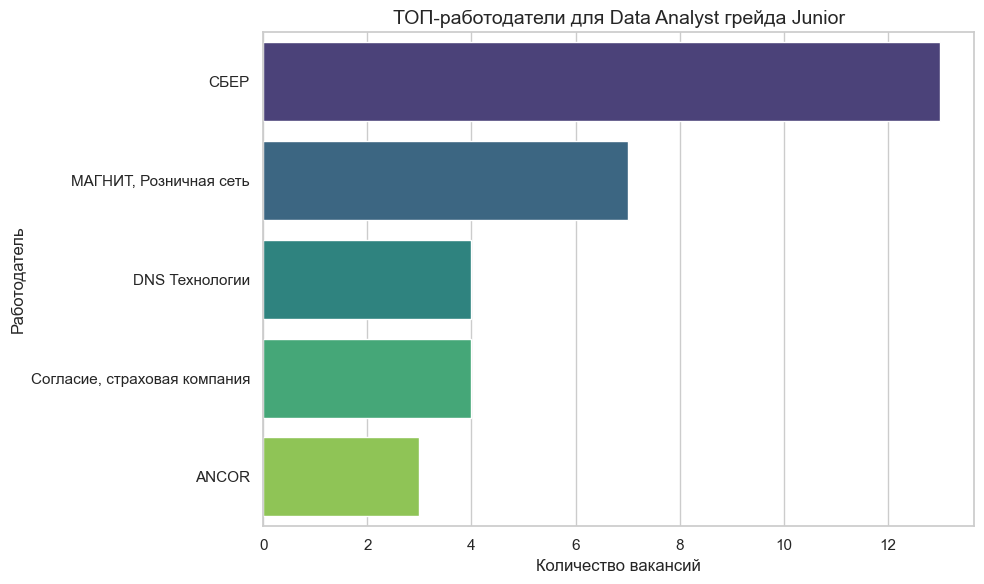


ТОП-работодатели для System Analyst грейда Junior:
                         employer  count
0                           Aston     16
1  Компания Апогей (1С-франчайзи)      8
2       TWIGA Communication Group      5
3                          Дунайс      4
4                        Ред Софт      3


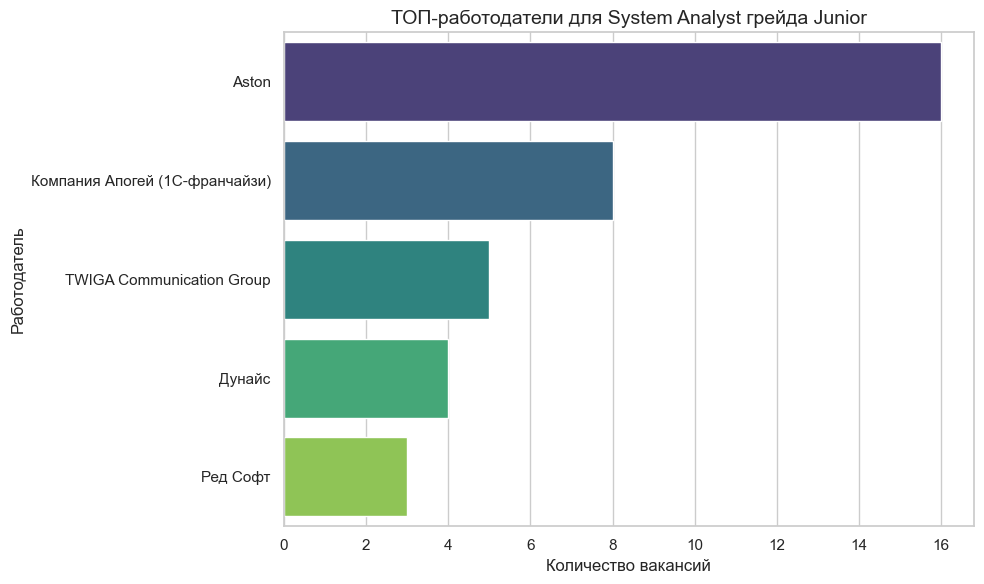


ТОП-работодатели для Data Analyst грейда Junior+:
                 employer  count
0                    СБЕР    159
1          Банк ВТБ (ПАО)     24
2                    Ozon     17
3             WILDBERRIES     16
4  МАГНИТ, Розничная сеть     15


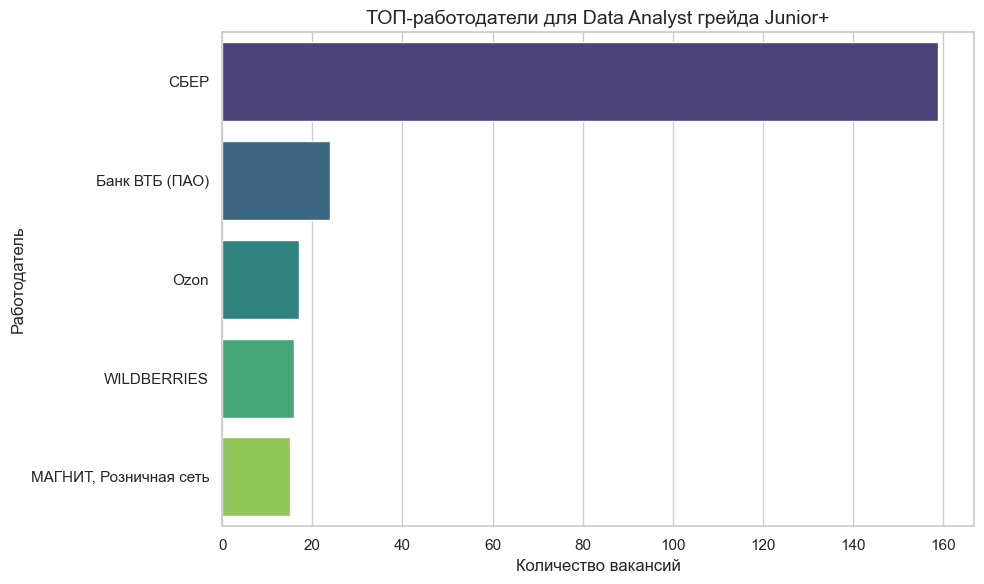


ТОП-работодатели для System Analyst грейда Junior+:
                          employer  count
0                             СБЕР     42
1                            Aston     25
2            Совкомбанк Технологии     22
3                               Т1     17
4  Красное & Белое, розничная сеть     16


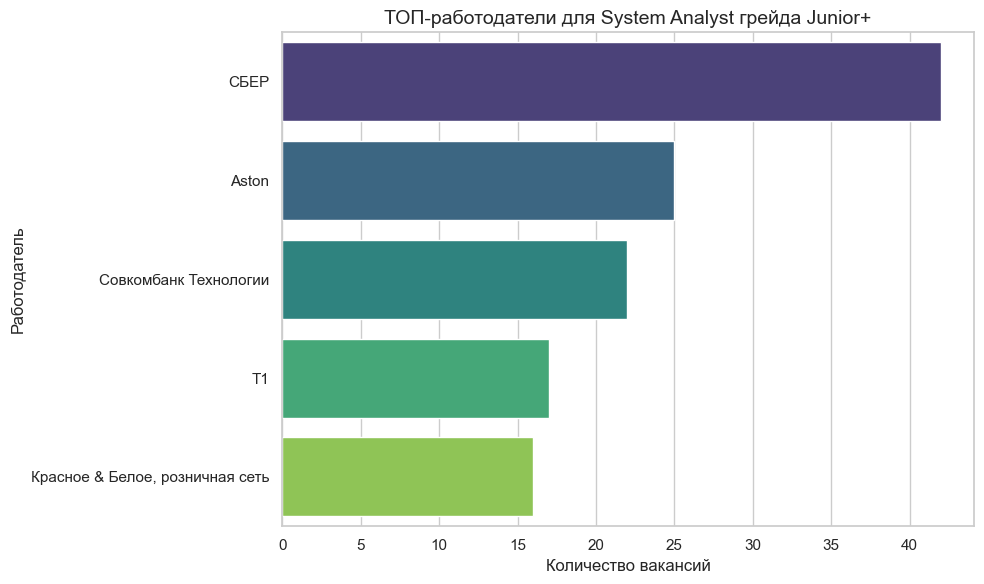


ТОП-работодатели для Data Analyst грейда Middle:
      employer  count
0         СБЕР     71
1  WILDBERRIES     26
2           Т1     21
3         Ozon     15
4       Яндекс     14


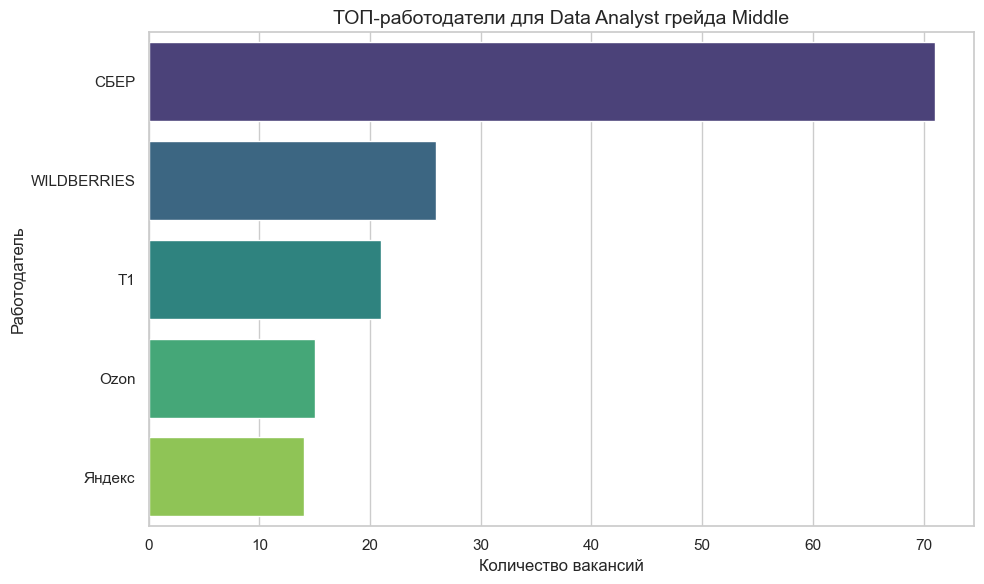


ТОП-работодатели для System Analyst грейда Middle:
                    employer  count
0                         Т1     57
1                       СБЕР     51
2                      Aston     23
3  ПСБ (ПАО «Промсвязьбанк»)     21
4                     Т-Банк     19


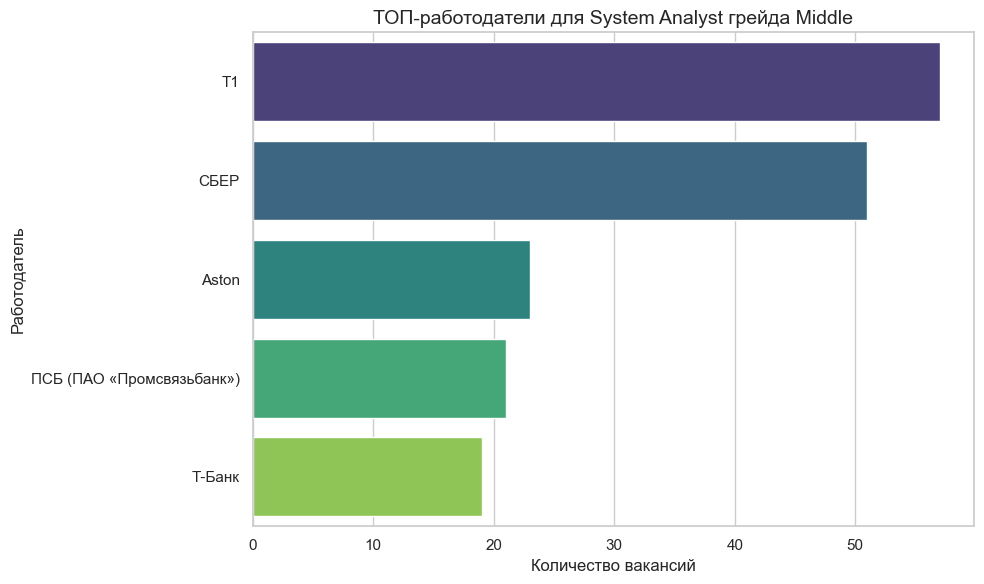


ТОП-работодатели для Data Analyst грейда Senior:
             employer  count
0        Леруа Мерлен      4
1    Reinvent Baltics      2
2  Aramco Innovations      1
3            B2Broker      1
4       CloudPayments      1


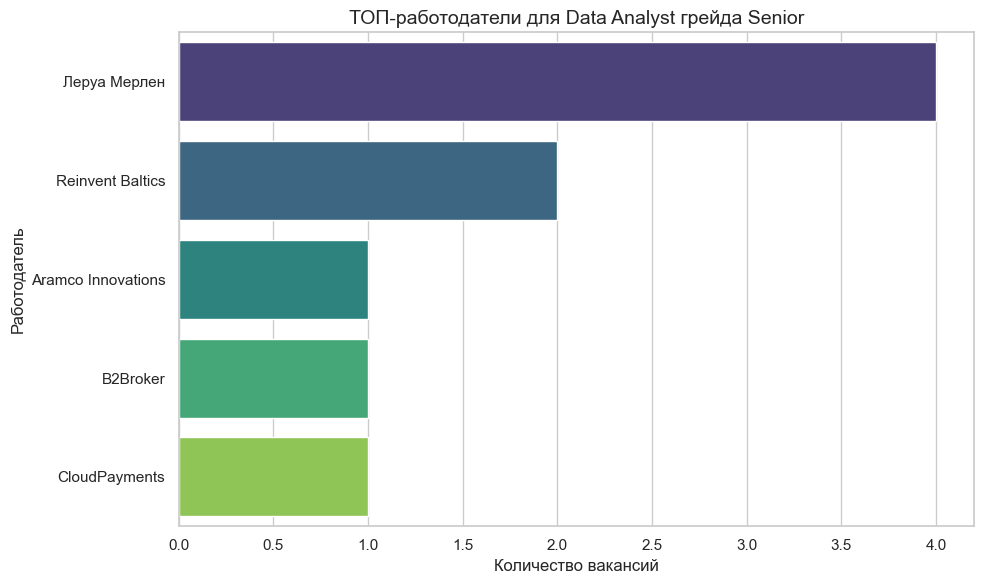


ТОП-работодатели для System Analyst грейда Senior:
                                          employer  count
0                                               Т1      3
1                                       Mediascope      2
2  БФТ-Холдинг (Бюджетные и Финансовые Технологии)      2
3                                          ТестОпс      2
4                                           Яндекс      2


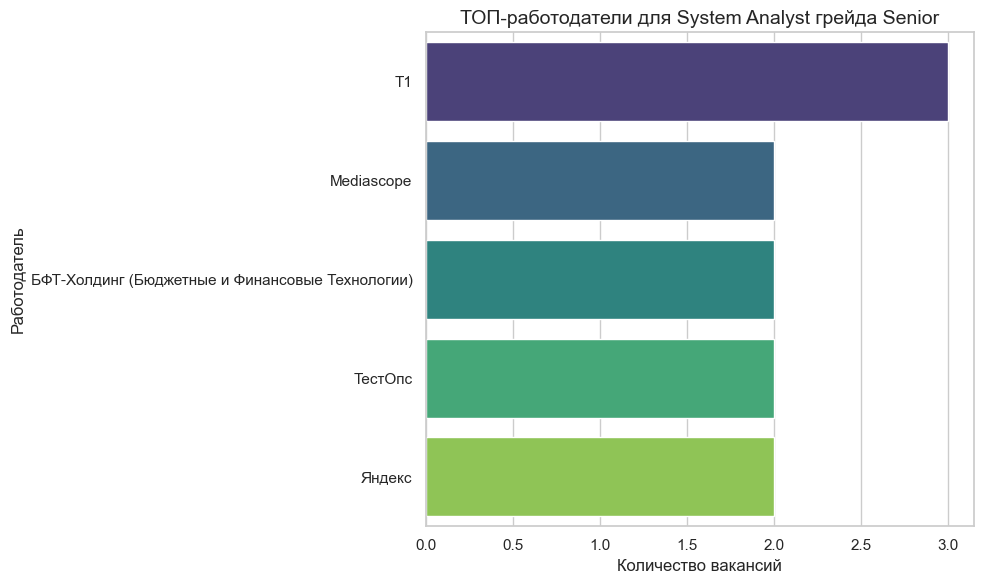

In [27]:
# Подсчет количества вакансий для каждого работодателя с учетом грейда и позиции
top_employers_by_grade_position = data.groupby(['grade', 'position_type', 'employer']).size().reset_index(name='count')

# Функция для вывода таблицы и построения графика ТОП-5 работодателей по грейдам и позициям
def display_top_employers_by_grade_position(grade, position_type):
    # Фильтруем данные для указанного грейда и позиции, сортируем по количеству вакансий
    filtered_data = top_employers_by_grade_position[
        (top_employers_by_grade_position['grade'] == grade) &
        (top_employers_by_grade_position['position_type'] == position_type)
    ].nlargest(5, 'count').reset_index()

    # Вывод таблицы с ТОП-5 работодателями для грейда и позиции
    print(f"\nТОП-работодатели для {position_type} грейда {grade}:")
    print(filtered_data[['employer', 'count']])

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_data, x='count', y='employer', palette='viridis')
    plt.title(f'ТОП-работодатели для {position_type} грейда {grade}', fontsize=14)
    plt.xlabel('Количество вакансий', fontsize=12)
    plt.ylabel('Работодатель', fontsize=12)
    plt.tight_layout()
    plt.show()

# Построение таблиц и графиков для каждой комбинации грейда и позиции
for grade in ['Junior', 'Junior+', 'Middle', 'Senior']:
    for position_type in ['Data Analyst', 'System Analyst']:
        display_top_employers_by_grade_position(grade, position_type)

Для позиции Data Analyst лидером среди работодателей почти для всех грейдов является СБЕР, который занимает первые места как среди Junior, Junior+, так и Middle специалистов. Наиболее значительное количество вакансий для Junior+ Data Analysts предложено компаниями СБЕР, Банк ВТБ (ПАО), Ozon, и WILDBERRIES. Среди Middle специалистов также выделяются WILDBERRIES и Т1. Для Senior Data Analysts вакансий значительно меньше, и лидерами являются компании Леруа Мерлен и Reinvent Baltics.

Для позиции System Analyst картина несколько иная. На уровне Junior лидером по количеству вакансий является Aston, за ним следуют компании Апогей и TWIGA Communication Group. На уровне Junior+ также лидирует СБЕР, но с меньшим отрывом, а среди других работодателей выделяются Aston и Совкомбанк Технологии. Для Middle специалистов Т1 и СБЕР по-прежнему остаются крупнейшими работодателями, однако в списке также появляются ПСБ (ПАО «Промсвязьбанк») и Т-Банк. Среди Senior System Analysts вакансий мало, и лидируют компании Т1, Mediascope и БФТ-Холдинг.

#### Анализ зарплаты

Для начала посмотрим на средние и медианные зарплаты у профессий в целом.

Средние и медианные зарплаты по профессиям:
    position_type    mean_salary  median_salary
0    Data Analyst  131415.264020       105000.0
1  System Analyst  195977.710183       210000.0


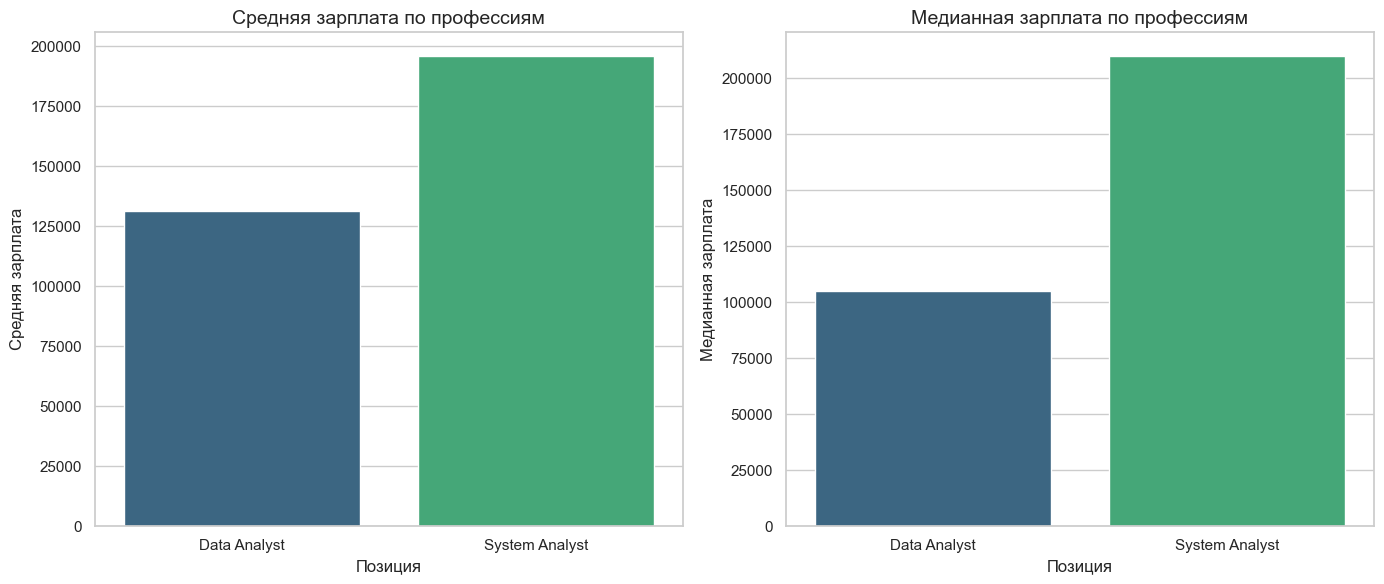

In [28]:
# Рассчитаем средние и медианные зарплаты по профессиям
salary_stats = data.groupby('position_type')['average_salary'].agg(['mean', 'median']).reset_index()

# Переименуем столбцы для удобства
salary_stats.columns = ['position_type', 'mean_salary', 'median_salary']

# Вывод таблицы с результатами
print("Средние и медианные зарплаты по профессиям:")
print(salary_stats)

# Построение графиков для наглядного сравнения средних и медианных зарплат
plt.figure(figsize=(14, 6))

# График средних зарплат
plt.subplot(1, 2, 1)
sns.barplot(data=salary_stats, x='position_type', y='mean_salary', palette='viridis')
plt.title('Средняя зарплата по профессиям', fontsize=14)
plt.xlabel('Позиция', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)

# График медианных зарплат
plt.subplot(1, 2, 2)
sns.barplot(data=salary_stats, x='position_type', y='median_salary', palette='viridis')
plt.title('Медианная зарплата по профессиям', fontsize=14)
plt.xlabel('Позиция', fontsize=12)
plt.ylabel('Медианная зарплата', fontsize=12)

plt.tight_layout()
plt.show()

Анализ средних и медианных зарплат показал, что System Analyst зарабатывает значительно больше, чем Data Analyst. Средняя зарплата для System Analyst составляет около 195,978 рублей, в то время как для Data Analyst — 131,415 рублей. Медианные значения также подтверждают это различие: медианная зарплата для System Analyst — 210,000 рублей, а для Data Analyst — 105,000 рублей. Эти данные свидетельствуют о том, что System Analysts получают более высокие предложения по зарплате на рынке труда, что может отражать более высокие требования и значимость этой позиции для работодателей. Однако необходимо учитывать, что количество вакансий грейдов Middle и Senior на позицию System Analyst больше, поэтому после заполнения пропусков средние и медианные значения могли сместиться.

Теперь изучим зарплаты детально по грейдам.

Сводная таблица средних и медианных зарплат по грейдам для Data Analyst и System Analyst:
     grade   position_type           mean    median
0   Junior    Data Analyst   70128.665493   70000.0
1   Junior  System Analyst   77534.302326   75000.0
2  Junior+    Data Analyst  106378.758020  105000.0
3  Junior+  System Analyst  147848.493545  146000.0
4   Middle    Data Analyst  194353.864865  192000.0
5   Middle  System Analyst  247237.200965  247500.0
6   Senior    Data Analyst  215000.000000  220000.0
7   Senior  System Analyst  272503.181818  270000.0


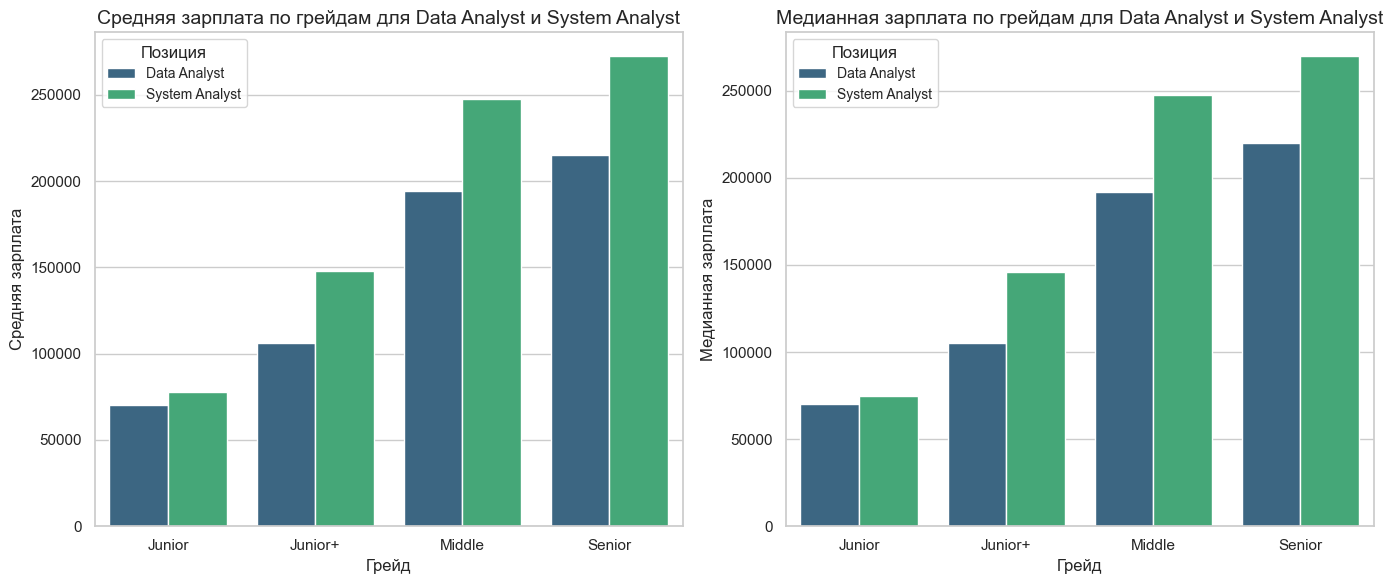

In [29]:
# Группируем данные по грейду и позиции, вычисляем средние и медианные зарплаты
salary_stats_by_grade = data.groupby(['grade', 'position_type'])['average_salary'].agg(['mean', 'median']).reset_index()

# Вывод сводной таблицы с показателями
print("Сводная таблица средних и медианных зарплат по грейдам для Data Analyst и System Analyst:")
print(salary_stats_by_grade)

# Построение графиков для сравнения средних и медианных зарплат по грейдам и позициям
plt.figure(figsize=(14, 6))

# График средних зарплат
plt.subplot(1, 2, 1)
sns.barplot(data=salary_stats_by_grade, x='grade', y='mean', hue='position_type', palette='viridis')
plt.title('Средняя зарплата по грейдам для Data Analyst и System Analyst', fontsize=14)
plt.xlabel('Грейд', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.legend(title='Позиция', fontsize=10, title_fontsize='12')

# График медианных зарплат
plt.subplot(1, 2, 2)
sns.barplot(data=salary_stats_by_grade, x='grade', y='median', hue='position_type', palette='viridis')
plt.title('Медианная зарплата по грейдам для Data Analyst и System Analyst', fontsize=14)
plt.xlabel('Грейд', fontsize=12)
plt.ylabel('Медианная зарплата', fontsize=12)
plt.legend(title='Позиция', fontsize=10, title_fontsize='12')

plt.tight_layout()
plt.show()

Анализ средних и медианных зарплат по грейдам показал значительные различия между позициями Data Analyst и System Analyst. На уровне Junior средняя зарплата для System Analyst составляет около 77,534 рублей, что несколько выше, чем у Data Analyst — 70,129 рублей. Медианные зарплаты также немного выше у System Analyst (75,000 рублей против 70,000 рублей у Data Analyst).

Для грейда Junior+ разница в зарплатах становится более заметной: средняя зарплата для System Analyst составляет 147,848 рублей, тогда как для Data Analyst — 106,379 рублей. Медианные значения показывают аналогичную тенденцию — 146,000 рублей для System Analyst и 105,000 рублей для Data Analyst.

На уровне Middle средняя зарплата для System Analyst достигает 247,237 рублей, в то время как для Data Analyst — 194,354 рублей. Медианные значения также подтверждают это различие: 247,500 рублей для System Analyst и 192,000 рублей для Data Analyst.

На грейде Senior System Analysts лидируют с самой высокой средней зарплатой в 272,503 рублей и медианной зарплатой 270,000 рублей. Для Data Analysts эти показатели составляют 215,000 и 220,000 рублей соответственно. В целом, разница в зарплатах увеличивается по мере повышения квалификации, что подчеркивает высокую оценку специалистов System Analyst на рынке труда.

#### Анализ типа занятости

Посмотрим на распределение типа занятости по позициям в целом.

In [30]:
# Просмотр уникальных значений для типа занятости
data['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

Распределение типа занятости по позициям:
            employment   position_type  count
0     Полная занятость    Data Analyst   1764
1     Полная занятость  System Analyst   1877
2     Проектная работа    Data Analyst      5
3     Проектная работа  System Analyst      3
4           Стажировка    Data Analyst     16
5           Стажировка  System Analyst     29
6  Частичная занятость    Data Analyst     16
7  Частичная занятость  System Analyst      6


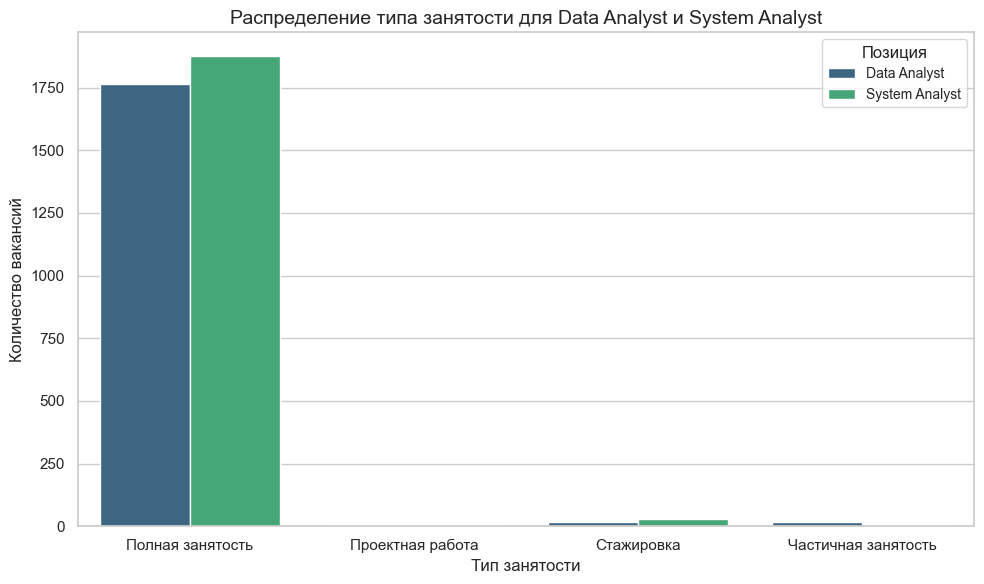

In [31]:
# Подсчет количества вакансий для каждого типа занятости и позиции
employment_stats = data.groupby(['employment', 'position_type']).size().reset_index(name='count')

# Вывод сводной таблицы с распределением типов занятости по позициям
print("Распределение типа занятости по позициям:")
print(employment_stats)

# Построение графика для наглядного сравнения типов занятости по позициям
plt.figure(figsize=(10, 6))
sns.barplot(data=employment_stats, x='employment', y='count', hue='position_type', palette='viridis')
plt.title('Распределение типа занятости для Data Analyst и System Analyst', fontsize=14)
plt.xlabel('Тип занятости', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.legend(title='Позиция', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()

Анализ распределения типов занятости показал, что подавляющее большинство вакансий как для Data Analyst, так и для System Analyst предлагают полную занятость (1764 и 1877 вакансий соответственно). Вакансии с проектной работой, стажировкой и частичной занятостью встречаются значительно реже. Это говорит о том, что работодатели преимущественно ищут специалистов на полный рабочий день.

Теперь рассмотрим распределение с детализацией по грейдам.


Распределение типа занятости для грейда Junior:
            employment   position_type  count
0     Полная занятость    Data Analyst    123
1     Полная занятость  System Analyst     56
2     Проектная работа    Data Analyst      1
3           Стажировка    Data Analyst     15
4           Стажировка  System Analyst     29
5  Частичная занятость    Data Analyst      3
6  Частичная занятость  System Analyst      1


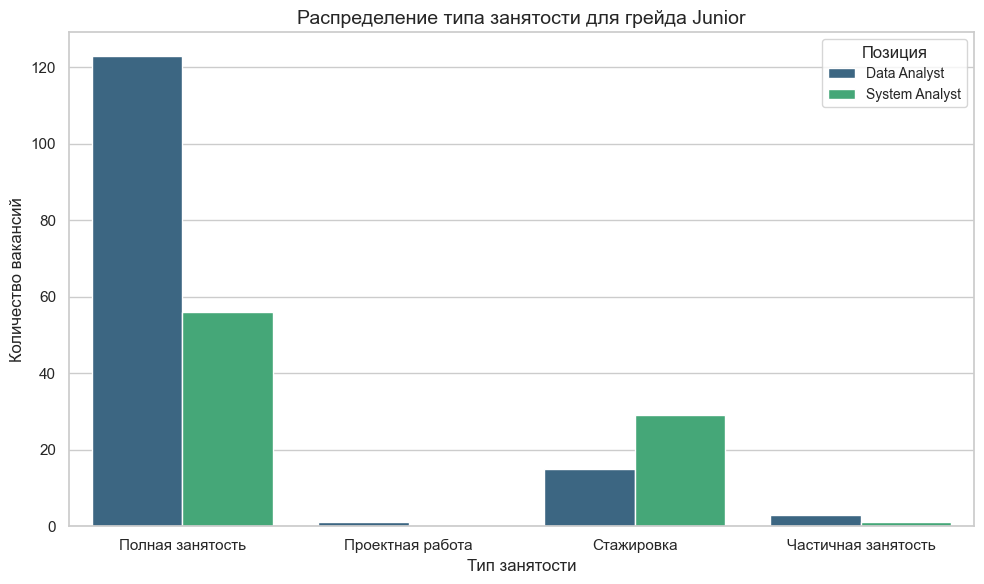


Распределение типа занятости для грейда Junior+:
             employment   position_type  count
7      Полная занятость    Data Analyst   1079
8      Полная занятость  System Analyst    851
9      Проектная работа    Data Analyst      3
10     Проектная работа  System Analyst      1
11           Стажировка    Data Analyst      1
12  Частичная занятость    Data Analyst      8


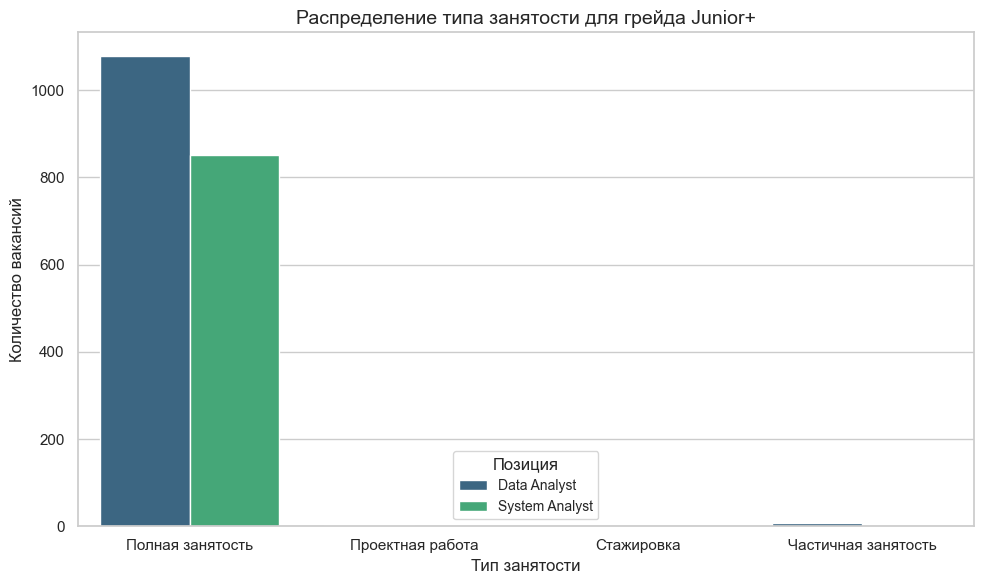


Распределение типа занятости для грейда Middle:
             employment   position_type  count
13     Полная занятость    Data Analyst    549
14     Полная занятость  System Analyst    926
15     Проектная работа    Data Analyst      1
16     Проектная работа  System Analyst      2
17  Частичная занятость    Data Analyst      5
18  Частичная занятость  System Analyst      5


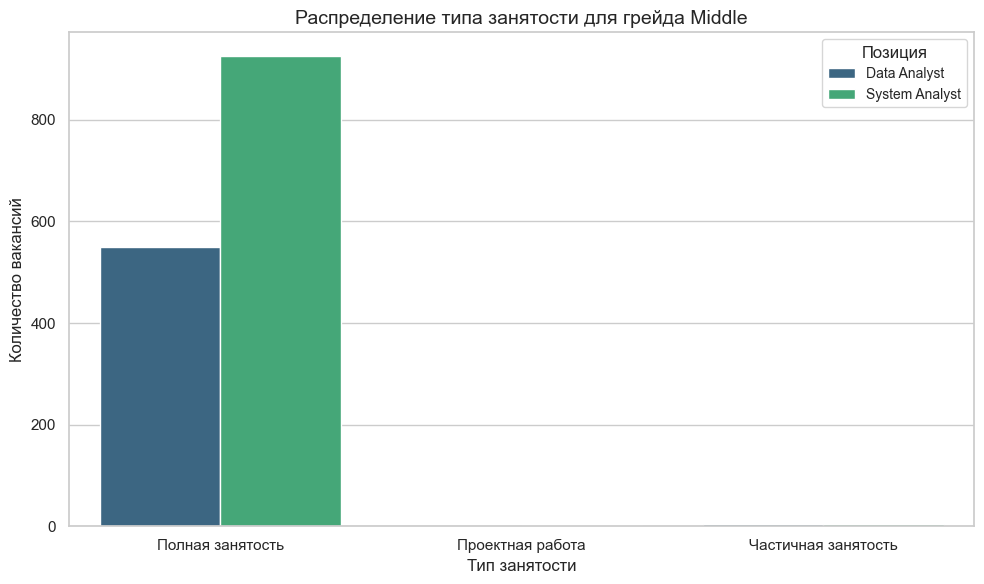


Распределение типа занятости для грейда Senior:
          employment   position_type  count
19  Полная занятость    Data Analyst     13
20  Полная занятость  System Analyst     44


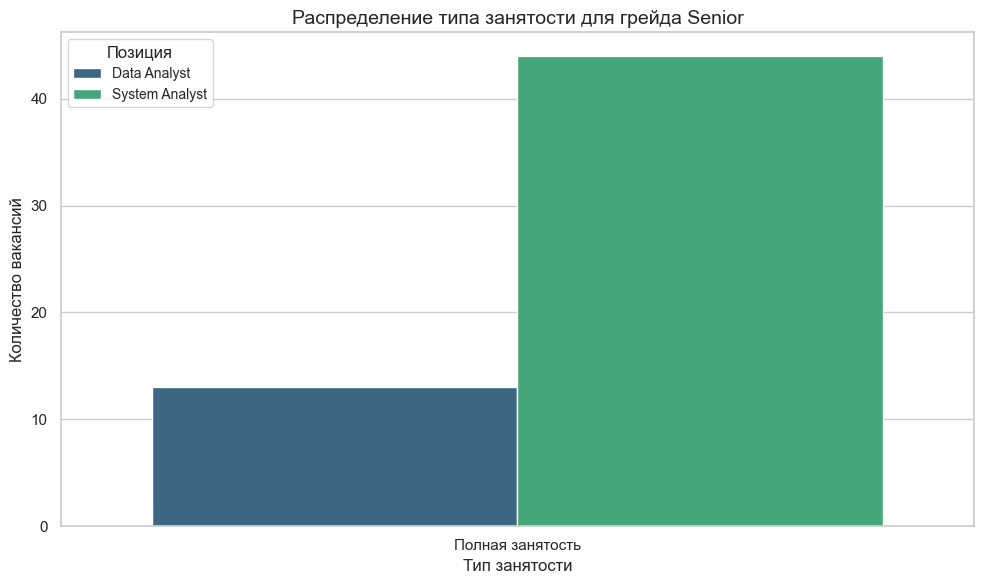

In [32]:
# Подсчет количества вакансий для каждого типа занятости, грейда и позиции
employment_by_grade = data.groupby(['grade', 'employment', 'position_type']).size().reset_index(name='count')

# Функция для вывода таблицы и построения графика распределения типов занятости по грейдам и позициям
def display_employment_by_grade_and_position(grade):
    # Фильтруем данные для указанного грейда
    filtered_data = employment_by_grade[employment_by_grade['grade'] == grade]

    # Вывод таблицы с результатами
    print(f"\nРаспределение типа занятости для грейда {grade}:")
    print(filtered_data[['employment', 'position_type', 'count']])

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_data, x='employment', y='count', hue='position_type', palette='viridis')
    plt.title(f'Распределение типа занятости для грейда {grade}', fontsize=14)
    plt.xlabel('Тип занятости', fontsize=12)
    plt.ylabel('Количество вакансий', fontsize=12)
    plt.legend(title='Позиция', fontsize=10, title_fontsize='12')
    plt.tight_layout()
    plt.show()

# Построение таблиц и графиков для каждого грейда
for grade in ['Junior', 'Junior+', 'Middle', 'Senior']:
    display_employment_by_grade_and_position(grade)

Как и ожидалось, анализ типов занятости по грейдам показывает, что полная занятость доминирует среди всех грейдов и для обеих позиций (Data Analyst и System Analyst). На грейде Junior вакансий с полной занятостью для Data Analyst насчитывается 123, а для System Analyst — 56. Стажировки также довольно распространены среди Junior специалистов, особенно для System Analysts (29 вакансий против 15 для Data Analysts). Проектная работа и частичная занятость встречаются редко и в основном только для Data Analysts.

На грейде Junior+ доля вакансий с полной занятостью еще выше: 1079 для Data Analysts и 851 для System Analysts. Это свидетельствует о том, что работодатели активно ищут сотрудников на полный рабочий день с небольшим опытом. Вакансии с частичной занятостью и проектной работой встречаются крайне редко, что указывает на меньший интерес к таким формам занятости на этом уровне.

Для грейдов Middle и Senior почти все вакансии также предлагаются на полную занятость: 549 и 926 вакансий для Middle Data Analysts и System Analysts соответственно, а также 13 и 44 вакансии для Senior специалистов. Проектная работа и частичная занятость встречаются крайне редко на этих уровнях квалификации, что подчеркивает высокие требования к стабильной занятости для более опытных сотрудников.

#### Анализ графика работы

Посмотрим на общее распределение графиков работы по позициям.

In [33]:
# Просмотр уникальных значений для графика работы
data['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

Распределение графика работы по позициям:
           schedule   position_type  count
0     Гибкий график    Data Analyst     41
1     Гибкий график  System Analyst     61
2       Полный день    Data Analyst   1441
3       Полный день  System Analyst   1203
4    Сменный график    Data Analyst      9
5    Сменный график  System Analyst      1
6  Удаленная работа    Data Analyst    310
7  Удаленная работа  System Analyst    650


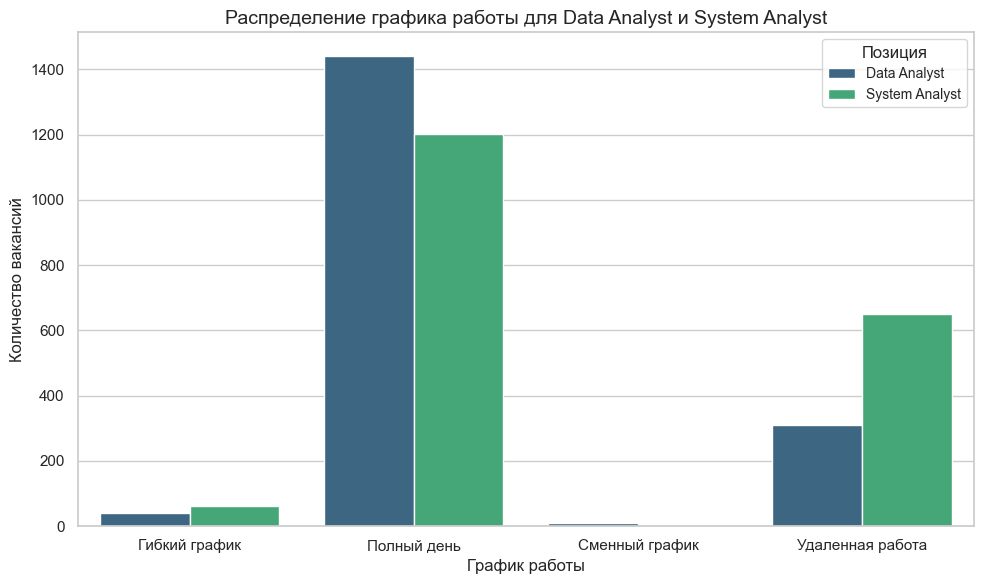

In [34]:
# Подсчет количества вакансий для каждого графика работы и позиции
schedule_stats = data.groupby(['schedule', 'position_type']).size().reset_index(name='count')

# Вывод сводной таблицы с распределением графика работы по позициям
print("Распределение графика работы по позициям:")
print(schedule_stats)

# Построение графика для наглядного сравнения графика работы по позициям
plt.figure(figsize=(10, 6))
sns.barplot(data=schedule_stats, x='schedule', y='count', hue='position_type', palette='viridis')
plt.title('Распределение графика работы для Data Analyst и System Analyst', fontsize=14)
plt.xlabel('График работы', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.legend(title='Позиция', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()

Анализ распределения графиков работы показал, что наиболее распространенный график для обеих позиций — полный день. Для Data Analysts таких вакансий 1441, а для System Analysts — 1203. Удаленная работа также занимает значительную долю, особенно для System Analysts, где таких вакансий 650 по сравнению с 310 для Data Analysts. По факту часто бывает, что удаленный график можно согласовать с руководителем, даже если изначально этого нет в вакансии, но оставим анализ как есть. Гибкий график встречается реже, но также имеет определенное количество вакансий: 61 для System Analysts и 41 для Data Analysts. Сменный график оказался наименее популярным для обеих позиций, с минимальным числом вакансий (9 для Data Analysts и всего 1 для System Analysts). Эти данные показывают, что работодатели преимущественно предпочитают полный рабочий день или удаленную работу для аналитиков.

Теперь детализируем анализ по грейдам.


Распределение графика работы для грейда Junior:
           schedule   position_type  count
0     Гибкий график    Data Analyst      3
1     Гибкий график  System Analyst      6
2       Полный день    Data Analyst    122
3       Полный день  System Analyst     51
4    Сменный график    Data Analyst      2
5  Удаленная работа    Data Analyst     15
6  Удаленная работа  System Analyst     29


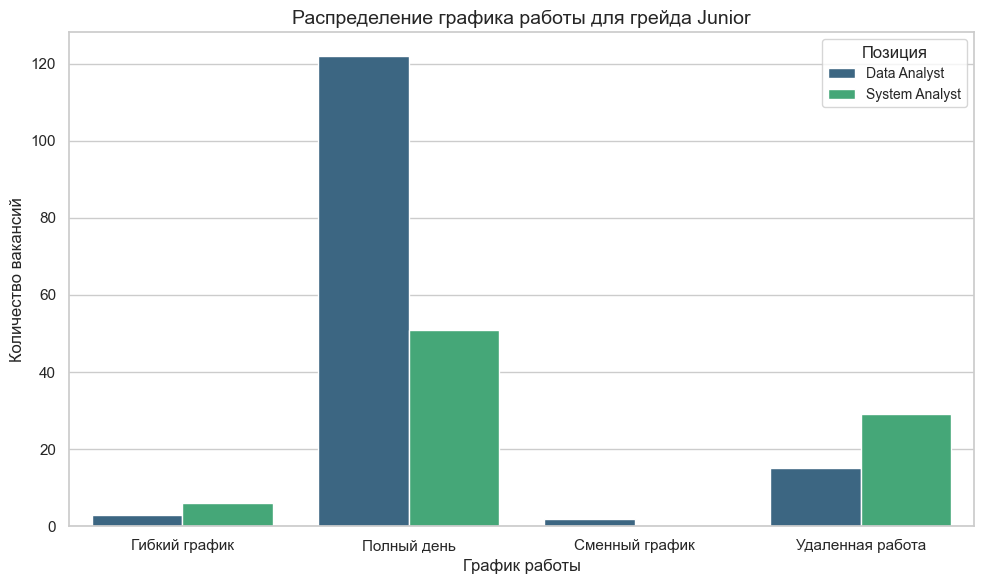


Распределение графика работы для грейда Junior+:
            schedule   position_type  count
7      Гибкий график    Data Analyst     21
8      Гибкий график  System Analyst     36
9        Полный день    Data Analyst    905
10       Полный день  System Analyst    553
11    Сменный график    Data Analyst      7
12  Удаленная работа    Data Analyst    158
13  Удаленная работа  System Analyst    263


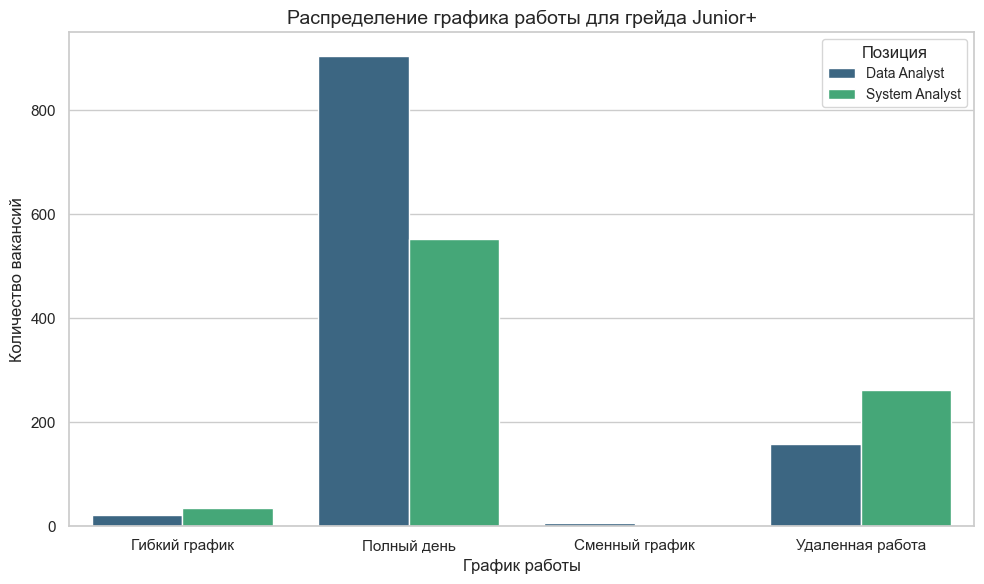


Распределение графика работы для грейда Middle:
            schedule   position_type  count
14     Гибкий график    Data Analyst     17
15     Гибкий график  System Analyst     17
16       Полный день    Data Analyst    406
17       Полный день  System Analyst    574
18    Сменный график  System Analyst      1
19  Удаленная работа    Data Analyst    132
20  Удаленная работа  System Analyst    341


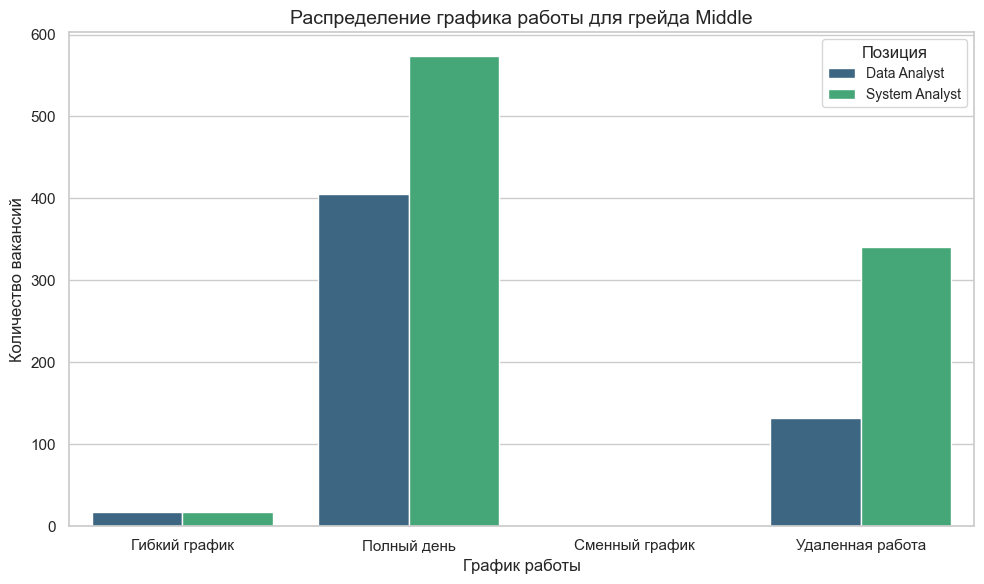


Распределение графика работы для грейда Senior:
            schedule   position_type  count
21     Гибкий график  System Analyst      2
22       Полный день    Data Analyst      8
23       Полный день  System Analyst     25
24  Удаленная работа    Data Analyst      5
25  Удаленная работа  System Analyst     17


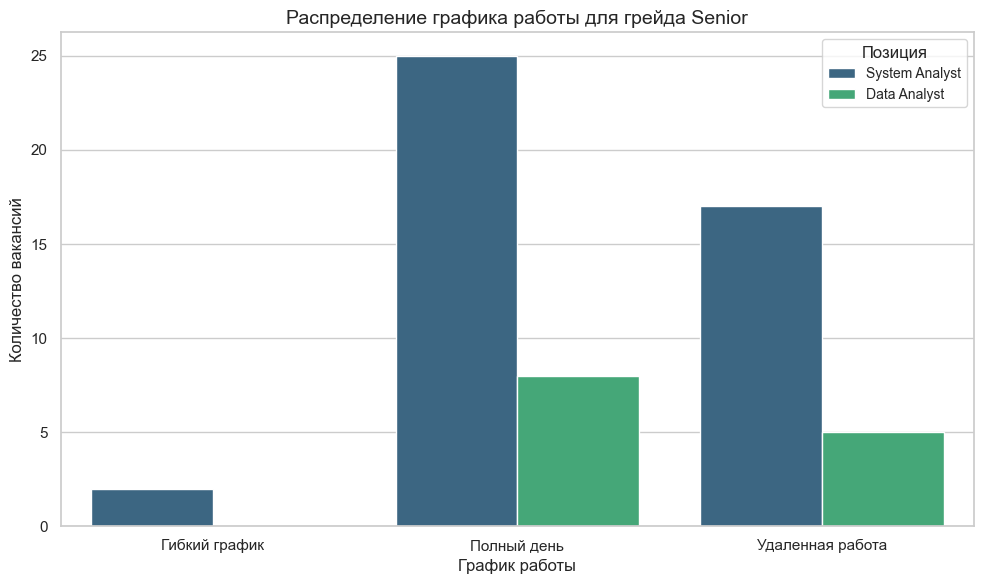

In [35]:
# Подсчет количества вакансий для каждого графика работы, грейда и позиции
schedule_by_grade = data.groupby(['grade', 'schedule', 'position_type']).size().reset_index(name='count')

# Функция для вывода таблицы и построения графика распределения графиков работы по грейдам и позициям
def display_schedule_by_grade_and_position(grade):
    # Фильтруем данные для указанного грейда
    filtered_data = schedule_by_grade[schedule_by_grade['grade'] == grade]

    # Вывод таблицы с результатами
    print(f"\nРаспределение графика работы для грейда {grade}:")
    print(filtered_data[['schedule', 'position_type', 'count']])

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_data, x='schedule', y='count', hue='position_type', palette='viridis')
    plt.title(f'Распределение графика работы для грейда {grade}', fontsize=14)
    plt.xlabel('График работы', fontsize=12)
    plt.ylabel('Количество вакансий', fontsize=12)
    plt.legend(title='Позиция', fontsize=10, title_fontsize='12')
    plt.tight_layout()
    plt.show()

# Построение таблиц и графиков для каждого грейда
for grade in ['Junior', 'Junior+', 'Middle', 'Senior']:
    display_schedule_by_grade_and_position(grade)

Анализ графиков работы по грейдам показывает, что полный день остается основным графиком для всех уровней квалификации и для обеих позиций (Data Analyst и System Analyst). На грейде Junior большинство вакансий предполагает полный рабочий день (122 для Data Analysts и 51 для System Analysts), но также имеется определенное количество вакансий с удаленной работой, особенно для System Analysts (29 вакансий против 15 для Data Analysts).

На уровне Junior+ наблюдается значительное увеличение числа вакансий с полным рабочим днем, особенно для Data Analysts (905 вакансий) и System Analysts (553 вакансии). Вакансии с удаленной работой также остаются востребованными, особенно для System Analysts, где таких вакансий 263 по сравнению с 158 для Data Analysts. Гибкий график работы становится более распространенным на этом уровне, но все же уступает по количеству полному дню.

Для грейда Middle полный день остается доминирующим графиком, но удаленная работа также играет значительную роль, особенно для System Analysts (341 вакансия против 132 для Data Analysts). Гибкий график присутствует в равной мере для обеих позиций, но его распространенность невелика по сравнению с другими типами графиков.

На грейде Senior полный день и удаленная работа продолжают быть основными типами графиков работы, однако количество вакансий заметно снижается. Полный день остается предпочтительным для System Analysts (25 вакансий) и Data Analysts (8 вакансий), а удаленная работа также предлагается в меньшем количестве для обоих грейдов. Гибкий график практически не представлен для Data Analysts и лишь в малом количестве встречается для System Analysts.

**Общий вывод по разделу:**

Для грейда Junior наблюдается значительное количество вакансий с полной занятостью и графиком работы "полный день" для обеих позиций. Вакансии со стажировкой также распространены среди начинающих специалистов, особенно для System Analysts. Основными работодателями для Junior Data Analysts выступают такие компании, как СБЕР и МАГНИТ, тогда как для Junior System Analysts лидируют Aston и Апогей. Зарплаты для этого грейда остаются на уровне начального уровня, с небольшим преимуществом для System Analysts.

Для грейда Junior+ доминирующим остается формат полной занятости и график "полный день". СБЕР продолжает лидировать среди работодателей как для Data Analysts, так и для System Analysts, что подчеркивает высокий спрос на специалистов с 1-3 годами опыта. Средние и медианные зарплаты для Junior+ значительно выше, чем для Junior, при этом System Analysts получают более высокие предложения по зарплате по сравнению с Data Analysts. Гибкий график и удаленная работа также становятся более доступными на этом уровне квалификации.

На грейде Middle сохраняется тенденция к полной занятости и графику "полный день", хотя удаленная работа становится более частой, особенно для System Analysts. Среди ведущих работодателей для Middle Data Analysts — СБЕР и WILDBERRIES, а для System Analysts — Т1 и СБЕР. Уровень зарплат для Middle специалистов заметно выше, что подчеркивает их ценность на рынке труда, и снова System Analysts получают более привлекательные зарплатные предложения.

Для грейда Senior практически все вакансии предполагают полный рабочий день или удаленную работу. Лидерами среди работодателей остаются крупные компании, такие как Леруа Мерлен для Data Analysts и Т1 для System Analysts. Зарплаты для Senior специалистов на обоих позициях достигают максимальных значений, хотя System Analysts продолжают лидировать по уровню доходов. Гибкий график практически отсутствует, что свидетельствует о высоких ожиданиях работодателей к опыту и доступности таких специалистов.

### Анализ навыков

Сравним востребованность твёрдых (hard) и мягких (soft) навыков, определим их связь с уровнем квалификации и специальностью. Выясним, какие навыки более важны для каждого грейда и для каждой из профессий.

#### Обработка данных о навыках

Для начала нам необходимо обработать данные о навыках.

Посмотрим, сколько всего уникальных навыков есть по позициям.

In [36]:
# Создаем множества для хранения уникальных навыков для каждой позиции
data_analyst_skills = set()
system_analyst_skills = set()

# Разделяем навыки в столбце key_skills и добавляем их в соответствующие множества
for index, row in data.iterrows():
    skills = set(row['key_skills'].strip('[]').replace("'", "").split(','))
    if row['position_type'] == 'Data Analyst':
        data_analyst_skills.update(skills)
    elif row['position_type'] == 'System Analyst':
        system_analyst_skills.update(skills)

# Выводим количество уникальных навыков и сами навыки для обеих позиций
print(f"Количество уникальных навыков для Data Analyst: {len(data_analyst_skills)}")
# print(f"Уникальные навыки для Data Analyst: {data_analyst_skills}")

print(f"\nКоличество уникальных навыков для System Analyst: {len(system_analyst_skills)}")
# print(f"Уникальные навыки для System Analyst: {system_analyst_skills}")

Количество уникальных навыков для Data Analyst: 926

Количество уникальных навыков для System Analyst: 1112


 Теперь посмотрим, сколько навыков у нас уже разбито на hard и soft, используя столбцы `hard_skills_from_description` и `soft_skills_from_description`.

In [37]:
# Преобразуем данные в списки для каждого столбца и создадим множества для хранения уникальных навыков
hard_skills = set()
soft_skills = set()

# Проходим по столбцу hard_skills_from_description и добавляем уникальные навыки
for skills_list in data['hard_skills_from_description'].dropna():
    skills = skills_list.strip('[]').replace("'", "").split(',')
    for skill in skills:
        hard_skills.add(skill.strip())

# Проходим по столбцу soft_skills_from_description и добавляем уникальные навыки
for skills_list in data['soft_skills_from_description'].dropna():
    skills = skills_list.strip('[]').replace("'", "").split(',')
    for skill in skills:
        soft_skills.add(skill.strip())

# Выведем количество уникальных навыков
len_hard_skills = len(hard_skills)
len_soft_skills = len(soft_skills)

len_hard_skills, len_soft_skills

(5, 15)

Получилось всего 5 hard и 15 soft навыков, не густо.

Теперь выведем топ-50 навыков для разных позиций по столбцу `key_skills`, а затем обработаем их вручную.

In [38]:
# Разделим навыки в столбце key_skills и создадим новую колонку с разделенными навыками
data['key_skills_list'] = data['key_skills'].str.strip('[]').str.replace("'", "").str.split(',')

# Развернем датафрейм так, чтобы каждый навык оказался в отдельной строке
exploded_skills = data.explode('key_skills_list')

# Уберем лишние пробелы
exploded_skills['key_skills_list'] = exploded_skills['key_skills_list'].str.strip()

# Группируем данные по навыкам и позиции, считаем частоту
skills_count = exploded_skills.groupby(['position_type', 'key_skills_list']).size().reset_index(name='count')

# Сортируем навыки по убыванию частоты и сбрасываем индексы снова
top_50_data_analyst_skills = skills_count[skills_count['position_type'] == 'Data Analyst'].sort_values(by='count', ascending=False).head(50).reset_index(drop=True)
top_50_system_analyst_skills = skills_count[skills_count['position_type'] == 'System Analyst'].sort_values(by='count', ascending=False).head(50).reset_index(drop=True)

# Выводим результаты для Data Analyst
print("Топ-50 навыков для Data Analyst:")
print(top_50_data_analyst_skills[['key_skills_list', 'count']])

# Выводим результаты для System Analyst
print("\nТоп-50 навыков для System Analyst:")
print(top_50_system_analyst_skills[['key_skills_list', 'count']])

Топ-50 навыков для Data Analyst:
                        key_skills_list  count
0                                   SQL    765
1                                Python    581
2                         Анализ данных    408
3                                          383
4                Аналитическое мышление    365
5                                Pandas    304
6                          Документация    280
7                              Power BI    222
8                              MS Excel    207
9                Работа с базами данных    185
10  Работа с большим объемом информации    183
11                         Коммуникация    181
12                            Аналитика    174
13                        Data Analysis    130
14                          Базы данных    128
15                               MS SQL    124
16                           confluence    119
17            Математическая статистика    108
18           Аналитические исследования     99
19             Сбор и анали

Теперь вручную пополним наши ранее созданные множества.

In [39]:
# Добавляем классифицированные навыки в соответствующие множества
hard_skills.update([
    'SQL', 'Python', 'Анализ данных', 'Pandas', 'Power BI',
    'MS Excel', 'Работа с базами данных', 'Работа с большим объемом информации',
    'Data Analysis', 'Базы данных', 'MS SQL', 'confluence', 'Математическая статистика',
    'Сбор и анализ информации', 'Tableau', 'PostgreSQL', 'Статистический анализ',
    'MS PowerPoint', 'A/B тесты', 'Бизнес-анализ', 'Big Data', 'Прогнозирование', 'ETL',
    'DWH', 'Сводные таблицы', 'MS Power BI', 'Hadoop', 'Математический анализ', 'VBA',
    'Подготовка презентаций', 'Юнит-экономика', 'Power Query', 'Spark', 'BI',
    'Визуализация данных', 'Clickhouse', 'Numpy', 'pandas'
])

soft_skills.update([
    'Аналитическое мышление', 'Документация', 'Коммуникация', 'Аналитика',
    'Аналитические исследования', 'Проактивность', 'Английский язык',
    'Работа в команде', 'Деловая коммуникация'
])

# Выводим обновленные размеры множеств
len(hard_skills), len(soft_skills)

(39, 20)

In [40]:
# Добавляем новые классифицированные навыки в соответствующие множества
hard_skills.update([
    'SQL', 'BPMN', 'Системный анализ', 'UML', 'confluence',
    'REST', 'SOAP', 'Разработка технических заданий', 'Постановка задач разработчикам',
    'XML', 'API', 'Бизнес-анализ', 'Atlassian Jira', 'JSON', 'Atlassian Confluence',
    'JSON API', 'PostgreSQL', 'Моделирование бизнес процессов', 'MS SQL', 'Аналитика',
    'Базы данных', 'REST API', 'Scrum', 'Работа с базами данных', 'Анализ данных',
    'Kafka', 'Системная интеграция', 'Техническая документация',
    'Оптимизация бизнес-процессов', 'Agile', 'Xsd', 'Работа с большим объемом информации',
    'Python', 'Postman', 'DWH', 'RabbitMQ', 'Agile Project Management', 'ERP-системы на базе 1С',
    'Анализ требований', 'СУБД', 'MS Visio', 'Swagger', 'Git'
])

soft_skills.update([
    'Аналитическое мышление', 'Документация', 'Коммуникация', 'Проактивность', 'Переговоры', 'Системное мышление'
])

# Выводим обновленные размеры множеств
len(hard_skills), len(soft_skills)

(71, 21)

Ситуация стала лучше, мы получили 71 hard и 21 soft навыков.

Теперь переопределим и заполним соответствующие столбцы, используя наши множества.

In [41]:
# Функция для классификации навыков и их распределения по hard и soft
def classify_skills(row):
    hard_skills_found = []
    soft_skills_found = []

    # Пройдемся по каждому навыку в key_skills_list
    for skill in row['key_skills_list']:
        skill = skill.strip()  # Удаляем лишние пробелы
        if skill in hard_skills:
            hard_skills_found.append(skill)
        elif skill in soft_skills:
            soft_skills_found.append(skill)

    # Присваиваем найденные навыки в соответствующие столбцы
    row['hard_skills_from_description'] = hard_skills_found if hard_skills_found else None
    row['soft_skills_from_description'] = soft_skills_found if soft_skills_found else None

    return row

In [42]:
# Применим функцию к каждому ряду в датафрейме
data = data.apply(classify_skills, axis=1)

# Подсчет пропусков в столбцах hard_skills_from_description и soft_skills_from_description
missing_hard_skills = data['hard_skills_from_description'].isna().sum()
missing_soft_skills = data['soft_skills_from_description'].isna().sum()

print(f"Число пропусков в hard_skills_from_description: {missing_hard_skills}")
print(f"Число пропусков в soft_skills_from_description: {missing_soft_skills}")

Число пропусков в hard_skills_from_description: 1073
Число пропусков в soft_skills_from_description: 1437


Пропусков стало гораздо меньше. К сожалению, обработать вручную свыше 1100 уникальных навыков достаточно тяжело. Остановимся на этом результате. Его должно быть достаточно для определения трендов.

#### Топ-навыков

Посмотрим на топ-10 твердых и мягких навыков для каждой позиции и грейда.

In [43]:
# Функция для получения топ-10 навыков для каждой комбинации грейд + позиция
def get_top_skills(data, skills_column, position, grade, top_n=10):
    # Фильтруем данные по позиции и грейду
    filtered_data = data[(data['position_type'] == position) & (data['grade'] == grade)]

    # Собираем все навыки в один список
    all_skills = []
    for skills_list in filtered_data[skills_column].dropna():
        all_skills.extend(skills_list)

    # Подсчитываем количество каждого навыка
    skills_count = pd.Series(all_skills).value_counts().head(top_n)

    return skills_count


Топ-10 твердых навыков для Data Analyst грейд Junior:
SQL                                    37
Python                                 34
Анализ данных                          31
MS Excel                               28
Работа с большим объемом информации    19
Pandas                                 19
Базы данных                            12
Аналитика                              11
Работа с базами данных                 11
MS PowerPoint                           8
dtype: int64

Топ-10 мягких навыков для Data Analyst грейд Junior:
Аналитическое мышление        40
Документация                  17
Коммуникация                  17
Аналитические исследования     8
Проактивность                  6
Работа в команде               6
Английский язык                5
Креативность                   4
Деловая коммуникация           3
Переговоры                     2
dtype: int64


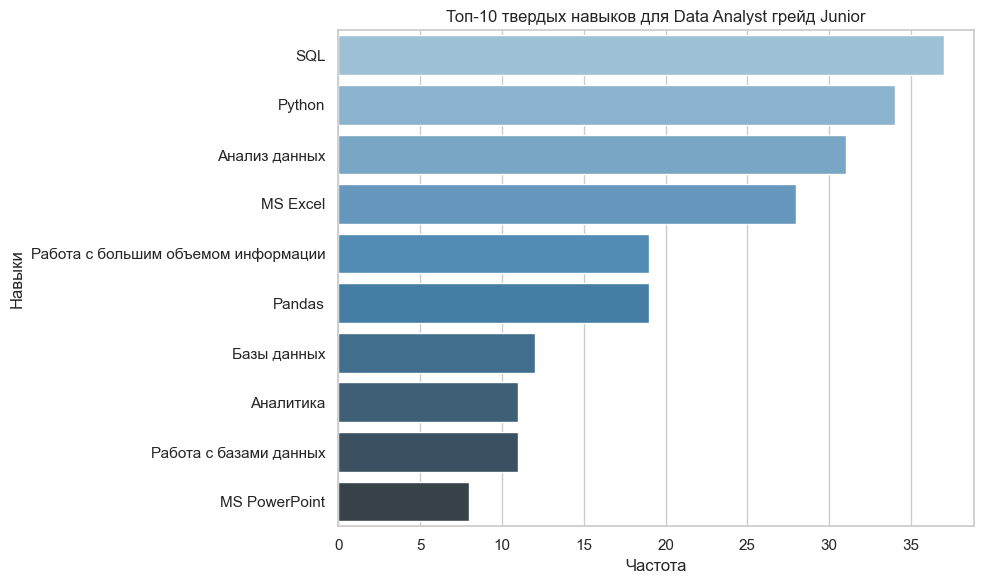

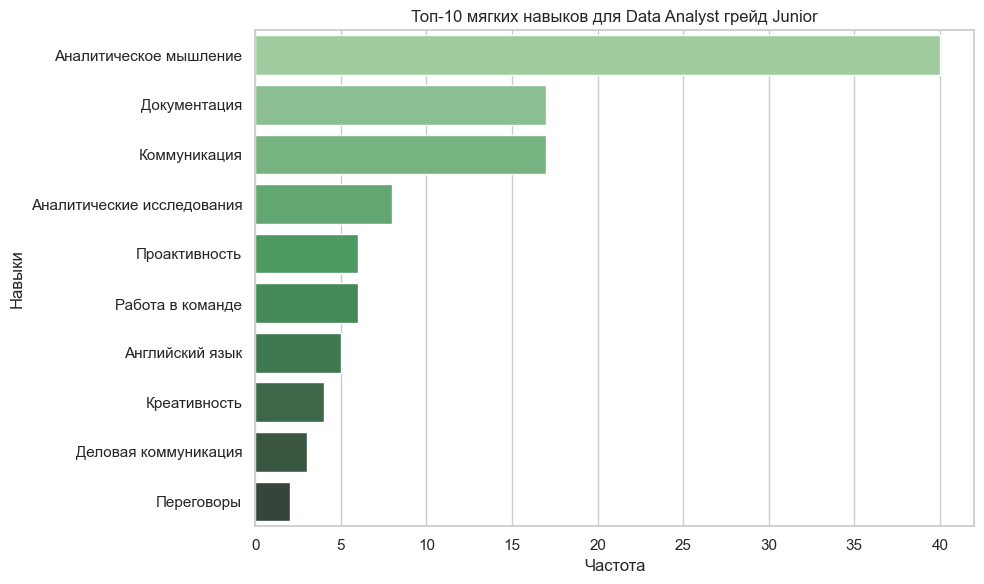


Топ-10 твердых навыков для Data Analyst грейд Junior+:
SQL                                    469
Python                                 321
Анализ данных                          262
Pandas                                 177
MS Excel                               140
Power BI                               139
Работа с базами данных                 121
Работа с большим объемом информации    119
Аналитика                              114
MS SQL                                  75
dtype: int64

Топ-10 мягких навыков для Data Analyst грейд Junior+:
Аналитическое мышление        241
Документация                  150
Коммуникация                  105
Аналитические исследования     57
Проактивность                  29
Английский язык                26
Деловая коммуникация           19
Работа в команде               17
Креативность                    8
Системное мышление              7
dtype: int64


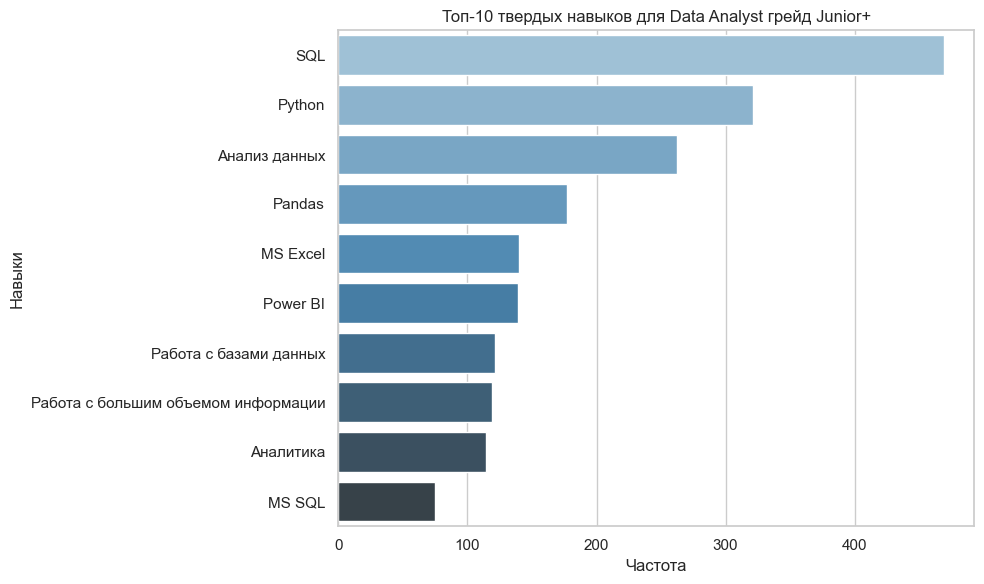

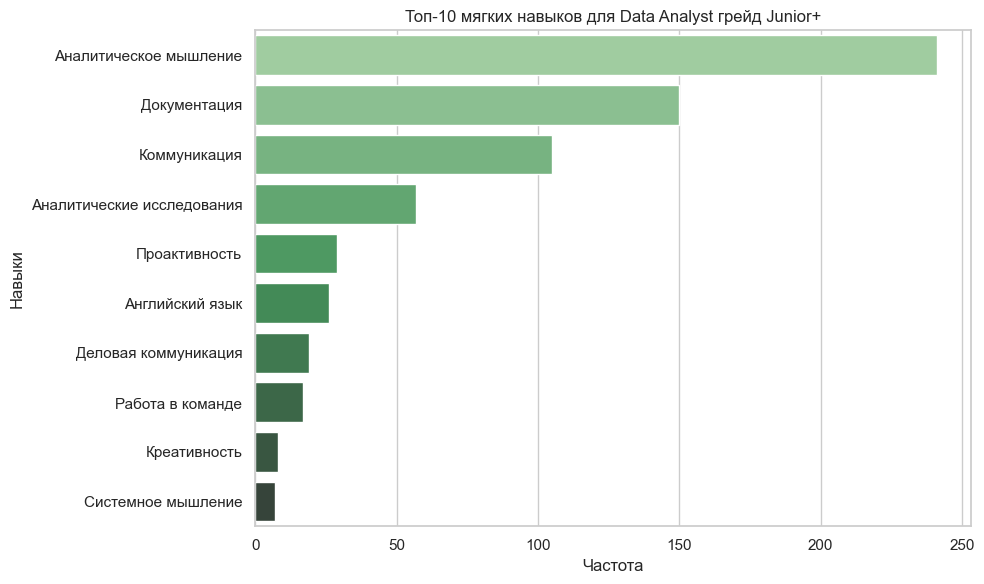


Топ-10 твердых навыков для Data Analyst грейд Middle:
SQL                                    250
Python                                 217
Анализ данных                          114
Pandas                                 104
Power BI                                72
Data Analysis                           61
Работа с базами данных                  53
Аналитика                               49
MS SQL                                  45
Работа с большим объемом информации     45
dtype: int64

Топ-10 мягких навыков для Data Analyst грейд Middle:
Документация                  109
Аналитическое мышление         82
Коммуникация                   56
Аналитические исследования     31
Проактивность                  15
Английский язык                10
Критическое мышление            9
Переговоры                      7
Системное мышление              4
Креативность                    4
dtype: int64


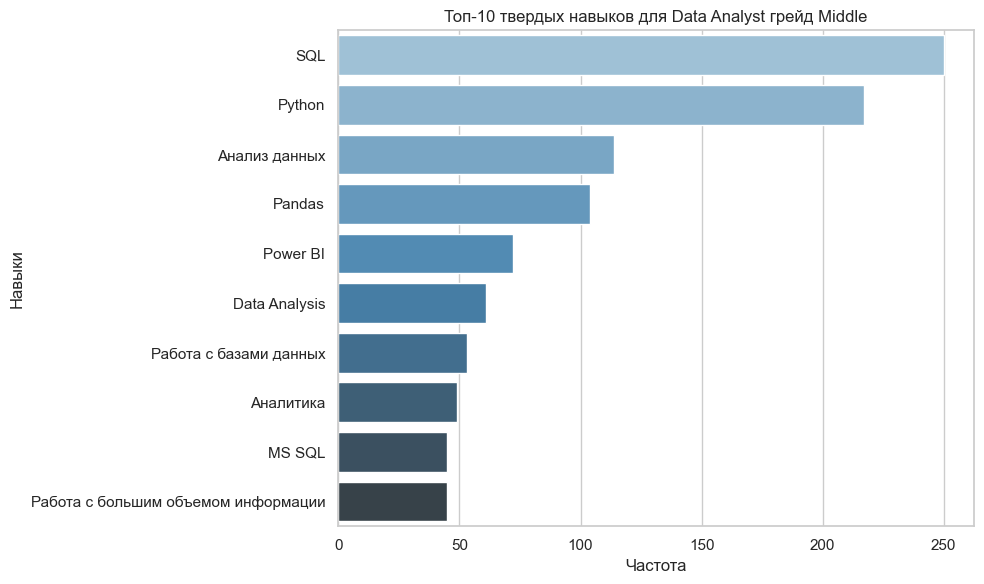

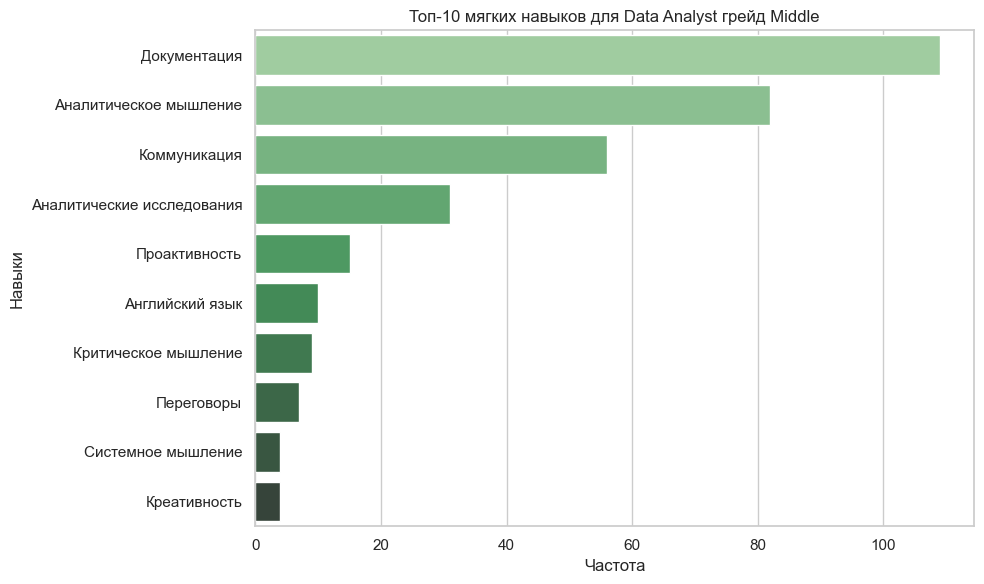


Топ-10 твердых навыков для Data Analyst грейд Senior:
SQL                9
Python             9
confluence         4
Power BI           4
Pandas             4
Data Analysis      3
Tableau            3
A/B тесты          3
Юнит-экономика     3
Прогнозирование    2
dtype: int64

Топ-10 мягких навыков для Data Analyst грейд Senior:
Документация                  4
Аналитические исследования    3
Английский язык               3
Презентация результатов       3
Проактивность                 3
Коммуникация                  3
Аналитическое мышление        2
Внимание к деталям            2
Решение проблем               2
dtype: int64


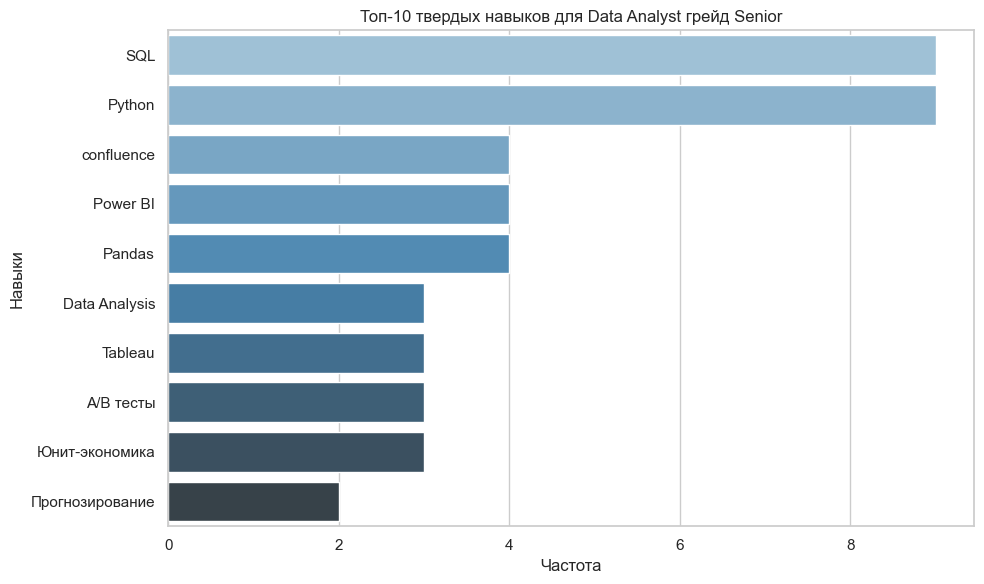

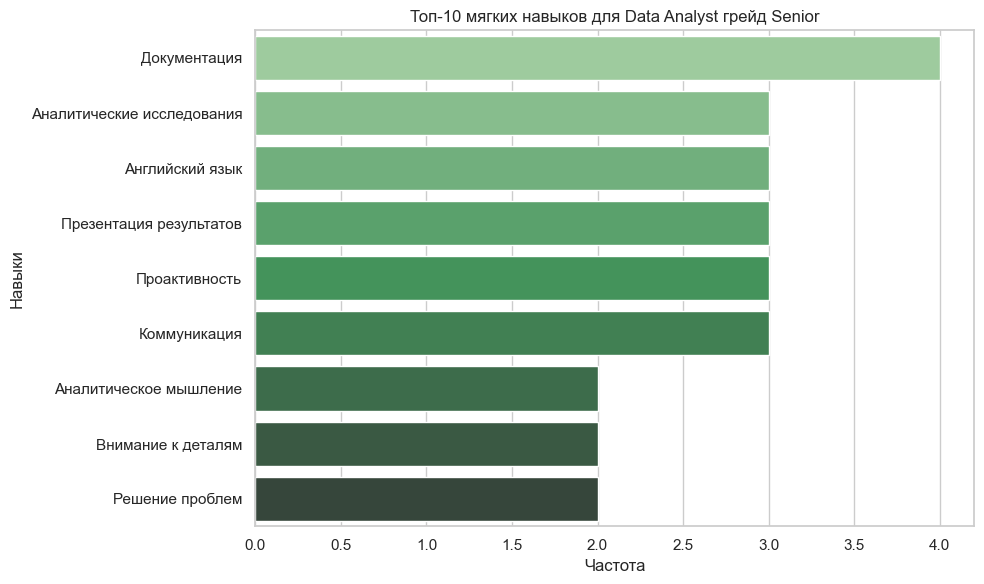


Топ-10 твердых навыков для System Analyst грейд Junior:
SQL                       34
Системный анализ          27
Бизнес-анализ             22
BPMN                      21
UML                       21
Работа с базами данных    20
REST                      18
Python                    18
JSON API                  17
Анализ данных             14
dtype: int64

Топ-10 мягких навыков для System Analyst грейд Junior:
Документация                  50
Аналитическое мышление        46
Коммуникация                   8
Аналитические исследования     7
Английский язык                2
Деловая коммуникация           1
Креативность                   1
Проактивность                  1
Системное мышление             1
dtype: int64


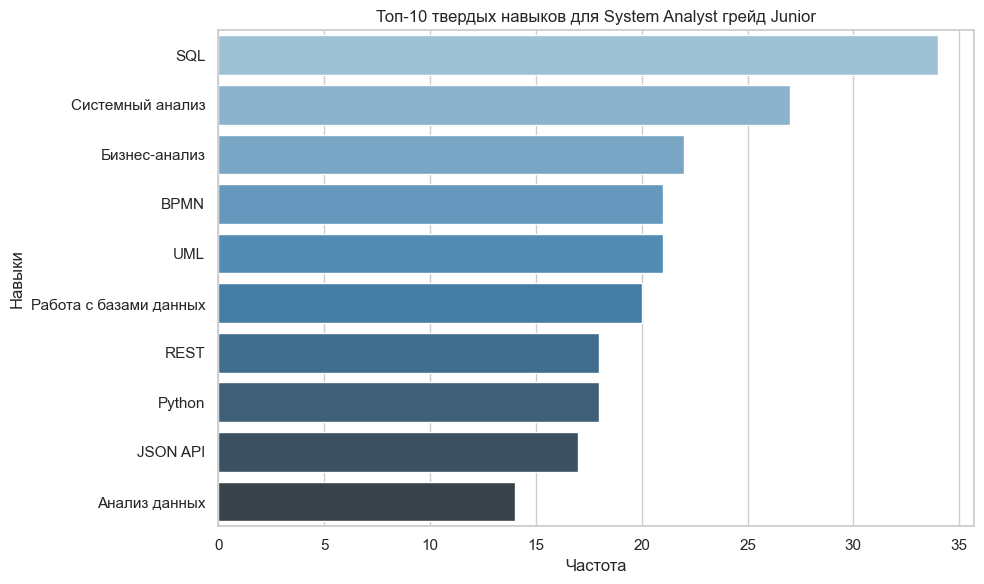

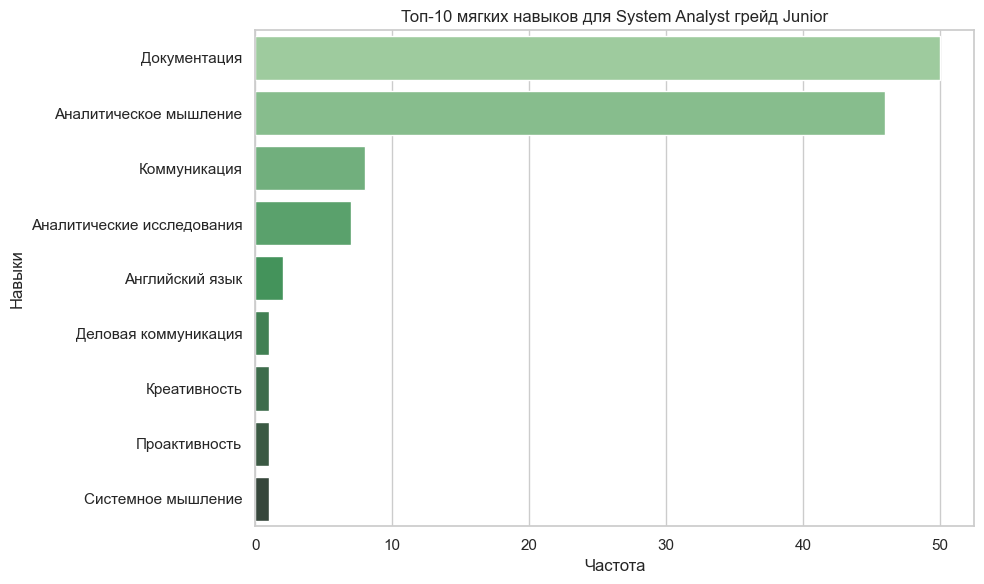


Топ-10 твердых навыков для System Analyst грейд Junior+:
BPMN                              280
SQL                               276
UML                               237
confluence                        233
Системный анализ                  223
REST                              145
Разработка технических заданий    130
Постановка задач разработчикам    104
SOAP                              100
XML                                94
dtype: int64

Топ-10 мягких навыков для System Analyst грейд Junior+:
Документация                  554
Аналитическое мышление        158
Коммуникация                  127
Проактивность                  24
Системное мышление             18
Переговоры                     17
Работа в команде               15
Аналитические исследования     12
Английский язык                12
Деловая коммуникация           12
dtype: int64


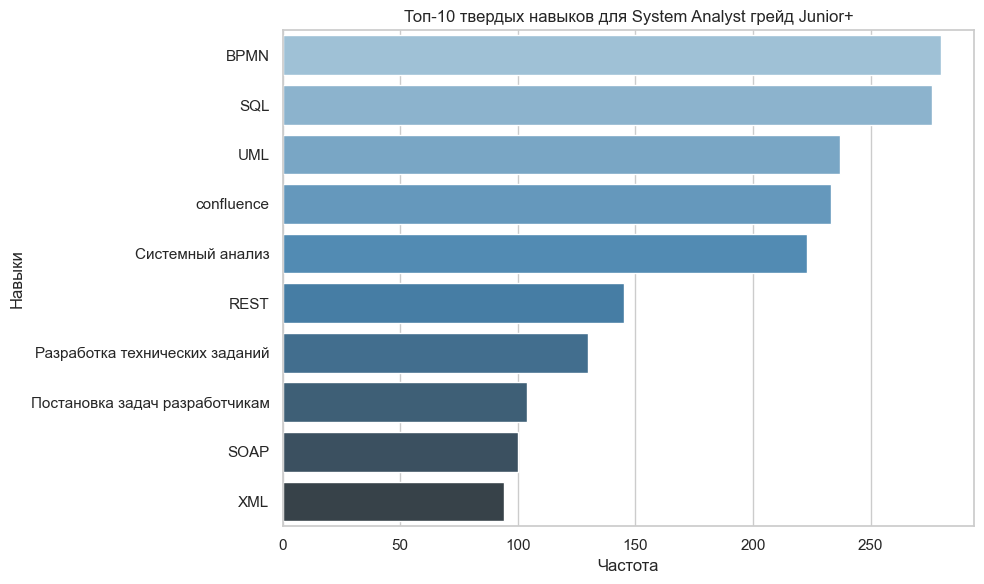

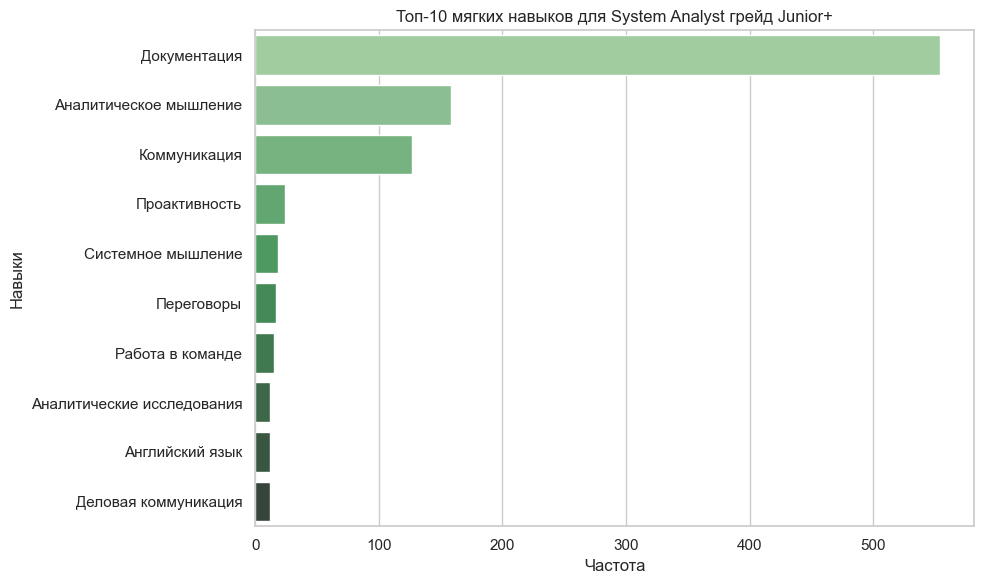


Топ-10 твердых навыков для System Analyst грейд Middle:
SQL                               343
BPMN                              317
confluence                        302
Системный анализ                  298
UML                               286
REST                              214
SOAP                              148
XML                               103
API                               102
Разработка технических заданий     99
dtype: int64

Топ-10 мягких навыков для System Analyst грейд Middle:
Документация                  658
Коммуникация                  138
Аналитическое мышление         87
Проактивность                  27
Переговоры                     20
Английский язык                17
Системное мышление             14
Работа в команде               11
Деловая коммуникация            9
Аналитические исследования      5
dtype: int64


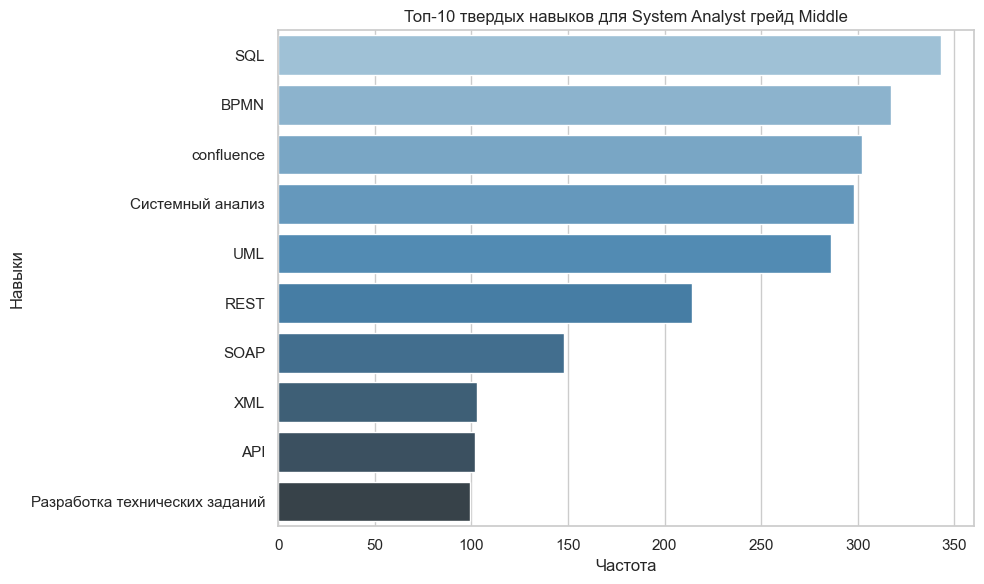

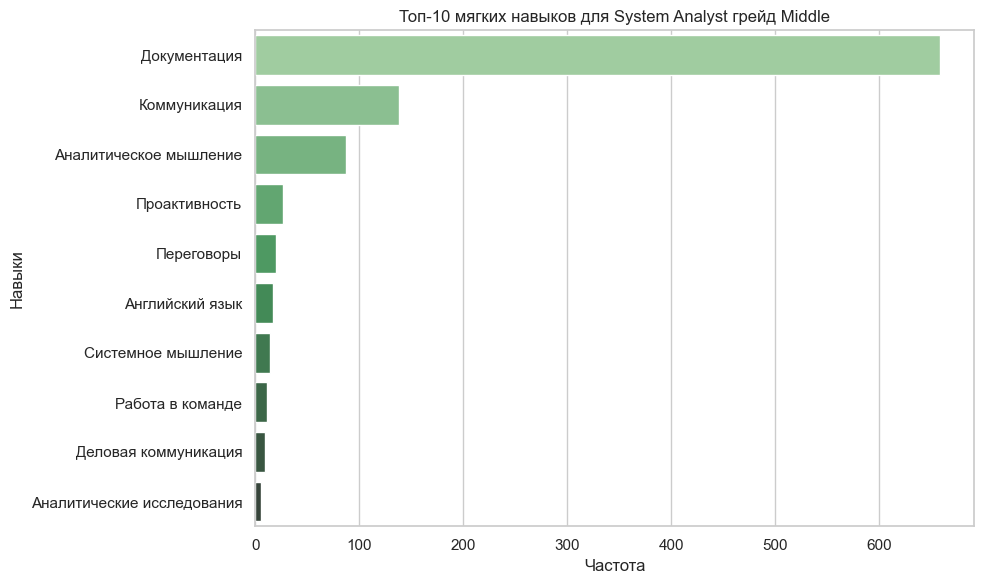


Топ-10 твердых навыков для System Analyst грейд Senior:
SQL                 20
BPMN                17
UML                 17
Системный анализ    16
REST                14
confluence          11
Atlassian Jira       8
API                  8
SOAP                 8
Python               7
dtype: int64

Топ-10 мягких навыков для System Analyst грейд Senior:
Документация              29
Коммуникация               7
Переговоры                 2
Английский язык            2
Креативность               2
Аналитическое мышление     2
Системное мышление         1
Деловая коммуникация       1
dtype: int64


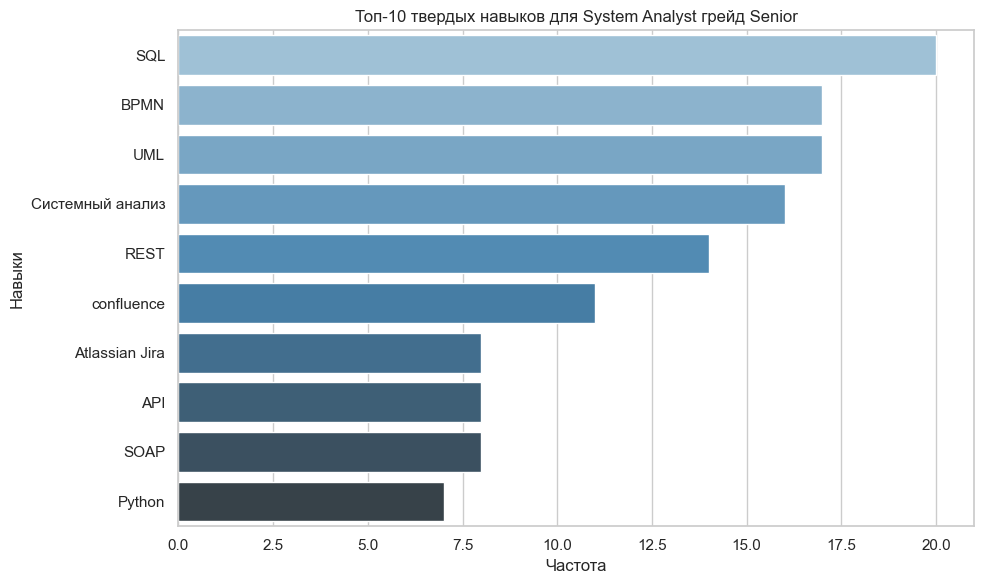

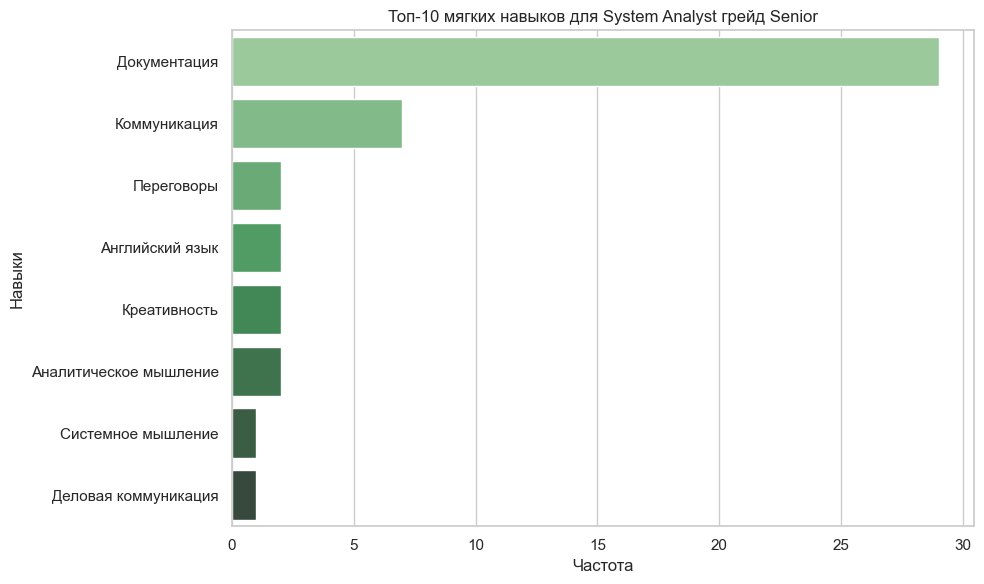

In [44]:
# Список позиций и грейдов
positions = data['position_type'].unique()
grades = data['grade'].unique()

# Проходим по каждой комбинации позиция + грейд
for position in positions:
    for grade in grades:
        print(f"\nТоп-10 твердых навыков для {position} грейд {grade}:")
        top_hard_skills = get_top_skills(data, 'hard_skills_from_description', position, grade)
        print(top_hard_skills)

        print(f"\nТоп-10 мягких навыков для {position} грейд {grade}:")
        top_soft_skills = get_top_skills(data, 'soft_skills_from_description', position, grade)
        print(top_soft_skills)

        # Визуализация для твердых навыков
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_hard_skills.values, y=top_hard_skills.index, palette='Blues_d')
        plt.title(f"Топ-10 твердых навыков для {position} грейд {grade}")
        plt.xlabel('Частота')
        plt.ylabel('Навыки')
        plt.tight_layout()
        plt.show()

        # Визуализация для мягких навыков
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_soft_skills.values, y=top_soft_skills.index, palette='Greens_d')
        plt.title(f"Топ-10 мягких навыков для {position} грейд {grade}")
        plt.xlabel('Частота')
        plt.ylabel('Навыки')
        plt.tight_layout()
        plt.show()

Для Data Analyst на всех уровнях квалификации основными твёрдыми навыками остаются SQL и Python, дополняемые инструментами анализа данных, такими как MS Excel, Pandas и Power BI. На начальных уровнях (Junior и Junior+) акцент больше на базовые инструменты, а на более высоких уровнях (Middle и Senior) — на продвинутую аналитику, работу с большими объёмами данных и более сложные методики. Мягкие навыки, такие как аналитическое мышление, коммуникация и документация, важны на всех этапах карьеры. Однако по мере роста квалификации увеличивается значимость навыков проактивности, работы в команде и критического мышления.

Для System Analyst основное внимание уделяется методологиям моделирования и интеграции (BPMN, UML, REST), а также системному и бизнес-анализу. На уровнях Junior и Junior+ важны навыки работы с базами данных и разработка технических заданий, в то время как для Middle и Senior ключевыми становятся навыки интеграции (API, SOAP, XML). Среди мягких навыков на всех уровнях лидируют документация и аналитическое мышление, однако на более высоких позициях возрастает роль коммуникации, переговоров и системного мышления.

В целом, работодатели чаще запрашивают твёрдые навыки, такие как SQL, Python, BPMN, и аналитические инструменты, что отражает техническую направленность обеих позиций. Наибольшее количество требований предъявляется к грейдам Junior+ и Middle, где ожидается широкий набор как твёрдых, так и мягких навыков, особенно для системных аналитиков.

#### Определение желаемого кандидата

Опишем наиболее востребованных кандидатов на позиции "Аналитик данных" и "Системный аналитик" по ключевым hard и soft навыкам.

Data Analyst:
- Junior: Основные навыки — SQL, Python, анализ данных и MS Excel. Среди мягких навыков — аналитическое мышление и коммуникация.
- Junior+: Основные навыки — SQL, Python, Pandas, Power BI и работа с базами данных. Мягкие навыки — документация, аналитическое мышление и коммуникация.
- Middle: Основные навыки — SQL, Python, Power BI, работа с большими данными и аналитика. Мягкие навыки — документация, аналитическое мышление и проактивность.
- Senior: Основные навыки — SQL, Python, A/B тесты, Power BI и Tableau. Мягкие навыки — документация, презентация результатов и решение проблем.

System Analyst:
- Junior: Основные навыки — SQL, системный анализ, UML, BPMN и бизнес-анализ. Мягкие навыки — документация и аналитическое мышление.
- Junior+: Основные навыки — BPMN, SQL, UML, REST и разработка технических заданий. Мягкие навыки — документация, аналитическое мышление и коммуникация.
- Middle: Основные навыки — SQL, BPMN, UML, REST и системный анализ. Мягкие навыки — документация, коммуникация и проактивность.
- Senior: Основные навыки — SQL, BPMN, UML, REST и системный анализ. Мягкие навыки — документация, коммуникация и переговоры.

## Общие выводы и рекомендации

В данной исследовательской работе был проведен анализ вакансий Аналитиков данных и Системных аналитиков, выгруженных с HH.ru за первую половину 2024 года.

В ходе работы удалось выявить топ-работодателей для каждой позиции с детализацией по грейдам, а так же информацию о предлагаемой заработной плате, типах занятости, графиках работы и самых важных hard и sotf навыков для кандидатов.

Рекомендации кандидатам:
- Junior: Кандидаты, начинающие свою карьеру как Data Analyst или System Analyst, должны фокусироваться на развитии базовых технических навыков, таких как SQL, Python, и методологии анализа данных. Важно укрепить навыки работы с ключевыми инструментами, такими как MS Excel и Power BI для Data Analyst и BPMN, UML, и REST для System Analyst. Уделите внимание развитию аналитического мышления и коммуникации, так как они востребованы на всех уровнях квалификации.

- Junior+: Специалисты с опытом от 1 до 3 лет должны углублять знание таких инструментов, как Pandas, Power BI (для Data Analysts) и SOAP, REST (для System Analysts). На этом уровне работодатели ожидают лучшего владения документацией, а также повышенного уровня коммуникации и взаимодействия с командой.

- Middle: Для более опытных кандидатов ключевыми становятся не только расширенные навыки технического анализа, но и способность работать с большими объёмами данных. System Analysts должны усиливать интеграционные навыки, включая API и системную интеграцию. Развитие проактивности и способностей к руководству проектами поможет выделиться среди других кандидатов.

- Senior: На этом уровне опытные кандидаты Data Analyst должны демонстрировать глубокие знания в таких областях, как A/B тестирование, Tableau, разработка бизнес-стратегий, а для System Analysts — системная архитектура и управление интеграциями. Способность эффективно презентовать результаты и вести переговоры становится важным элементом успеха на руководящих и старших позициях.